In [1062]:
%%capture
!pip install linearmodels

In [1063]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import os, sys
parent_dir = os.path.abspath('../../')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
from functions.exploratory_analysis import create_scatter_plots_grid
from functions.pooled_ols import create_balanced_panel, regression_model_statsmodels, regression_model_linearmodels, analyze_regression_results, analyze_linearmodels_regression_results
from functions.create_panel_dataset import remove_outliers

In [1064]:
foundational_df_no_transformations = pd.read_csv('output/foundational_no_transformations.csv')
foundational_df_transformed = pd.read_csv('output/foundational_transformed.csv')
foundational_df_no_transformations_accounts = pd.read_csv('output/foundational_no_transformations_accounts.csv')
foundational_df_transformed_accounts = pd.read_csv('output/foundational_transformed_accounts.csv')
foundational_df_no_transformations_exiobase = pd.read_csv('output/foundational_df_no_transformations_exiobase.csv')
foundational_df_transformed_exiobase = pd.read_csv('output/foundational_df_transformed_exiobase.csv')
foundational_df_no_transformations_accounts_exiobase = pd.read_csv('output/foundational_df_no_transformations_accounts_exiobase.csv')
foundational_df_transformed_accounts_exiobase = pd.read_csv('output/foundational_df_transformed_accounts_exiobase.csv')

In [1065]:
time_periods = [2012, 2016, 2020]
time_periods_accounts = [year for year in range(1995, 2020)]
foundational_df_transformed_unbalanced = foundational_df_transformed.copy()
foundational_df_unbalanced_no_transformations = foundational_df_no_transformations.copy()
foundational_df_transformed_unbalanced_accounts = foundational_df_transformed_accounts.copy()
foundational_df_unbalanced_no_transformations_accounts = foundational_df_no_transformations_accounts.copy()
foundational_df_transformed_unbalanced_exiobase = foundational_df_transformed_exiobase.copy()
foundational_df_unbalanced_no_transformations_exiobase = foundational_df_no_transformations_exiobase.copy()
foundational_df_transformed_unbalanced_accounts_exiobase = foundational_df_transformed_accounts_exiobase.copy()
foundational_df_unbalanced_no_transformations_accounts_exiobase = foundational_df_no_transformations_accounts_exiobase.copy()

Values from the StandardScaler used to transform the data (not used now but could be useful e.g for plots?)

In [1066]:
scaler_df = pd.read_csv('output/scaler_values.csv')
energy_scale = scaler_df.loc[scaler_df['variable'] == 'energy', 'scale'].values[0]
energy_mean = scaler_df.loc[scaler_df['variable'] == 'energy', 'mean'].values[0]

## Hypothesis

The higher the share of employment/labor in the Foundational sector of the economy (Material or Providential), the higher the chance that related needs could be met at a low level of energy use

## Key assumptions and parameters (TBD)

For now just a p-value, might add more constants here later

In [1067]:
assumptions = {'p_value_threshold': 0.05}

## Removing outliers

In [1068]:
create_scatter_plots_grid(foundational_df_no_transformations, 'TIME_PERIOD', ['energy'], time_periods)

In [1069]:
create_scatter_plots_grid(foundational_df_no_transformations, 'TIME_PERIOD', ['overlooked', 'material', 'providential', 'other'], time_periods)

In [1070]:
# compare mean values of overlooked, material, providential, and other, format as percentage and round to 2 decimal places
means = foundational_df_no_transformations.groupby('TIME_PERIOD')[['overlooked', 'material', 'providential', 'other']].mean().apply(lambda x: round(x * 100, 2))
# rename TIME_PERIOD to Year
means.index.names = ['Year']
# save to latex, keep 2 decimal places
means.to_latex('output/tables/means.tex', float_format="%.2f")

In [1071]:
# three maximum  values of the "foundational" variable with the geo and TIME_PERIOD of the observation
max_foundational_10 = foundational_df_no_transformations.loc[foundational_df_no_transformations['foundational'].nlargest(10).index, ['geo', 'TIME_PERIOD', 'energy', 'foundational', 'material', 'overlooked', 'providential', 'other']]
min_foundational_10 = foundational_df_no_transformations.loc[foundational_df_no_transformations['foundational'].nsmallest(10).index, ['geo', 'TIME_PERIOD', 'energy', 'foundational', 'material', 'overlooked', 'providential', 'other']]
max_foundational_10

geo  TIME_PERIOD    energy  foundational  material  overlooked  \
764  LT         2012  81.26107      0.529484  0.193515    0.183011   
765  LT         2012  81.26107      0.529484  0.193515    0.183011   
766  LT         2012  81.26107      0.529484  0.193515    0.183011   
767  LT         2012  81.26107      0.529484  0.193515    0.183011   
768  LT         2012  81.26107      0.529484  0.193515    0.183011   
769  LT         2012  81.26107      0.529484  0.193515    0.183011   
770  LT         2012  81.26107      0.529484  0.193515    0.183011   
771  LT         2012  81.26107      0.529484  0.193515    0.183011   
772  LT         2012  81.26107      0.529484  0.193515    0.183011   
773  LT         2012  81.26107      0.529484  0.193515    0.183011   

     providential     other  
764      0.335969  0.287505  
765      0.335969  0.287505  
766      0.335969  0.287505  
767      0.335969  0.287505  
768      0.335969  0.287505  
769      0.335969  0.287505  
770      0.335969  0.287505  
771      0.335969  0.287505  
772      0.335969  0.287505  
773      0.335969  0.287505

In [1072]:
min_foundational_10

geo  TIME_PERIOD     energy  foundational  material  overlooked  \
904  MT         2012  41.337486      0.174263  0.055209    0.331162   
905  MT         2012  41.337486      0.174263  0.055209    0.331162   
906  MT         2012  41.337486      0.174263  0.055209    0.331162   
907  MT         2012  41.337486      0.174263  0.055209    0.331162   
908  MT         2012  41.337486      0.174263  0.055209    0.331162   
909  MT         2012  41.337486      0.174263  0.055209    0.331162   
910  MT         2012  41.337486      0.174263  0.055209    0.331162   
911  MT         2012  41.337486      0.174263  0.055209    0.331162   
912  MT         2012  41.337486      0.174263  0.055209    0.331162   
913  MT         2012  41.337486      0.174263  0.055209    0.331162   

     providential     other  
904      0.119054  0.494575  
905      0.119054  0.494575  
906      0.119054  0.494575  
907      0.119054  0.494575  
908      0.119054  0.494575  
909      0.119054  0.494575  
910      0.119054  0.494575  
911      0.119054  0.494575  
912      0.119054  0.494575  
913      0.119054  0.494575

In [1073]:
create_scatter_plots_grid(foundational_df_no_transformations, 'TIME_PERIOD', ['foundational', 'nonfoundational'], [2008, 2012, 2016, 2020], countries_to_annotate=[{'geo': 'FI', 'TIME_PERIOD': 2008, 'show': 'foundational'}, {'geo': 'MT', 'TIME_PERIOD': 2012, 'show': 'nonfoundational'}, {'geo': 'LV', 'TIME_PERIOD': 2016, 'show': 'foundational'}, {'geo': 'TR', 'TIME_PERIOD': 2016, 'show': 'nonfoundational'}, {'geo': 'LU', 'TIME_PERIOD': 2008, 'show': 'nonfoundational'}, {'geo': 'LT', 'TIME_PERIOD': 2012, 'show': 'foundational'}, {'geo': 'FR', 'TIME_PERIOD': 2020, 'show': 'foundational'}, {'geo': 'AT', 'TIME_PERIOD': 2016, 'show': 'foundational'}, {'geo': 'DE', 'TIME_PERIOD': 2012, 'show': 'foundational'}, {'geo': 'NO', 'TIME_PERIOD': 2012, 'show': 'nonfoundational'}, {'geo': 'ES', 'TIME_PERIOD': 2008, 'show': 'nonfoundational'}, {'geo': 'MT', 'TIME_PERIOD': 2012, 'show': 'foundational'}], rows=1, height=400, save_path='output/figures/exploratory/foundational_scatter.png')

In [1074]:
max_material_10 = foundational_df_no_transformations.loc[foundational_df_no_transformations['material'].nlargest(10).index, ['geo', 'TIME_PERIOD', 'energy', 'foundational', 'material', 'overlooked', 'providential', 'other']]
min_material_10 = foundational_df_no_transformations.loc[foundational_df_no_transformations['material'].nsmallest(10).index, ['geo', 'TIME_PERIOD', 'energy', 'foundational', 'material', 'overlooked', 'providential', 'other']]
max_material_10

geo  TIME_PERIOD      energy  foundational  material  overlooked  \
1002  NO         2012  176.629566      0.400156  0.226876    0.153934   
1003  NO         2012  176.629566      0.400156  0.226876    0.153934   
1004  NO         2012  176.629566      0.400156  0.226876    0.153934   
1005  NO         2012  176.629566      0.400156  0.226876    0.153934   
1006  NO         2012  176.629566      0.400156  0.226876    0.153934   
1007  NO         2012  176.629566      0.400156  0.226876    0.153934   
1008  NO         2012  176.629566      0.400156  0.226876    0.153934   
1009  NO         2012  176.629566      0.400156  0.226876    0.153934   
1010  NO         2012  176.629566      0.400156  0.226876    0.153934   
1011  NO         2012  176.629566      0.400156  0.226876    0.153934   

      providential    other  
1002       0.17328  0.44591  
1003       0.17328  0.44591  
1004       0.17328  0.44591  
1005       0.17328  0.44591  
1006       0.17328  0.44591  
1007       0.17328  0.44591  
1008       0.17328  0.44591  
1009       0.17328  0.44591  
1010       0.17328  0.44591  
1011       0.17328  0.44591

In [1075]:
min_material_10

geo  TIME_PERIOD     energy  foundational  material  overlooked  \
904  MT         2012  41.337486      0.174263  0.055209    0.331162   
905  MT         2012  41.337486      0.174263  0.055209    0.331162   
906  MT         2012  41.337486      0.174263  0.055209    0.331162   
907  MT         2012  41.337486      0.174263  0.055209    0.331162   
908  MT         2012  41.337486      0.174263  0.055209    0.331162   
909  MT         2012  41.337486      0.174263  0.055209    0.331162   
910  MT         2012  41.337486      0.174263  0.055209    0.331162   
911  MT         2012  41.337486      0.174263  0.055209    0.331162   
912  MT         2012  41.337486      0.174263  0.055209    0.331162   
913  MT         2012  41.337486      0.174263  0.055209    0.331162   

     providential     other  
904      0.119054  0.494575  
905      0.119054  0.494575  
906      0.119054  0.494575  
907      0.119054  0.494575  
908      0.119054  0.494575  
909      0.119054  0.494575  
910      0.119054  0.494575  
911      0.119054  0.494575  
912      0.119054  0.494575  
913      0.119054  0.494575

In [1076]:
max_providential_10 = foundational_df_no_transformations.loc[foundational_df_no_transformations['providential'].nlargest(10).index, ['geo', 'TIME_PERIOD', 'energy', 'foundational', 'material', 'overlooked', 'providential', 'other']]
min_providential_10 = foundational_df_no_transformations.loc[foundational_df_no_transformations['providential'].nsmallest(10).index, ['geo', 'TIME_PERIOD', 'energy', 'foundational', 'material', 'overlooked', 'providential', 'other']]
max_providential_10

geo  TIME_PERIOD      energy  foundational  material  overlooked  \
323  DK         2012  102.841928      0.501643  0.104049    0.092449   
324  DK         2012  102.841928      0.501643  0.104049    0.092449   
325  DK         2012  102.841928      0.501643  0.104049    0.092449   
326  DK         2012  102.841928      0.501643  0.104049    0.092449   
327  DK         2012  102.841928      0.501643  0.104049    0.092449   
328  DK         2012  102.841928      0.501643  0.104049    0.092449   
329  DK         2012  102.841928      0.501643  0.104049    0.092449   
330  DK         2012  102.841928      0.501643  0.104049    0.092449   
331  DK         2012  102.841928      0.501643  0.104049    0.092449   
332  DK         2012  102.841928      0.501643  0.104049    0.092449   

     providential     other  
323      0.397594  0.405909  
324      0.397594  0.405909  
325      0.397594  0.405909  
326      0.397594  0.405909  
327      0.397594  0.405909  
328      0.397594  0.405909  
329      0.397594  0.405909  
330      0.397594  0.405909  
331      0.397594  0.405909  
332      0.397594  0.405909

In [1077]:
min_providential_10

geo  TIME_PERIOD     energy  foundational  material  overlooked  \
1295  SK         2008  92.033081      0.278457  0.195830    0.180928   
196   CY         2012  55.577152      0.282603  0.185088    0.277041   
197   CY         2012  55.577152      0.282603  0.185088    0.277041   
198   CY         2012  55.577152      0.282603  0.185088    0.277041   
199   CY         2012  55.577152      0.282603  0.185088    0.277041   
200   CY         2012  55.577152      0.282603  0.185088    0.277041   
201   CY         2012  55.577152      0.282603  0.185088    0.277041   
202   CY         2012  55.577152      0.282603  0.185088    0.277041   
203   CY         2012  55.577152      0.282603  0.185088    0.277041   
204   CY         2012  55.577152      0.282603  0.185088    0.277041   

      providential     other  
1295      0.082627  0.540615  
196       0.097515  0.440356  
197       0.097515  0.440356  
198       0.097515  0.440356  
199       0.097515  0.440356  
200       0.097515  0.440356  
201       0.097515  0.440356  
202       0.097515  0.440356  
203       0.097515  0.440356  
204       0.097515  0.440356

In [1078]:
max_overlooked_10 = foundational_df_no_transformations.loc[foundational_df_no_transformations['overlooked'].nlargest(10).index, ['geo', 'TIME_PERIOD', 'energy', 'foundational', 'material', 'overlooked', 'providential', 'other']]
min_overlooked_10 = foundational_df_no_transformations.loc[foundational_df_no_transformations['overlooked'].nsmallest(10).index, ['geo', 'TIME_PERIOD', 'energy', 'foundational', 'material', 'overlooked', 'providential', 'other']]
max_overlooked_10

geo  TIME_PERIOD      energy  foundational  material  overlooked  \
812  LU         2008  344.918507      0.203877  0.088709    0.332281   
904  MT         2012   41.337486      0.174263  0.055209    0.331162   
905  MT         2012   41.337486      0.174263  0.055209    0.331162   
906  MT         2012   41.337486      0.174263  0.055209    0.331162   
907  MT         2012   41.337486      0.174263  0.055209    0.331162   
908  MT         2012   41.337486      0.174263  0.055209    0.331162   
909  MT         2012   41.337486      0.174263  0.055209    0.331162   
910  MT         2012   41.337486      0.174263  0.055209    0.331162   
911  MT         2012   41.337486      0.174263  0.055209    0.331162   
912  MT         2012   41.337486      0.174263  0.055209    0.331162   

     providential     other  
812      0.115168  0.463842  
904      0.119054  0.494575  
905      0.119054  0.494575  
906      0.119054  0.494575  
907      0.119054  0.494575  
908      0.119054  0.494575  
909      0.119054  0.494575  
910      0.119054  0.494575  
911      0.119054  0.494575  
912      0.119054  0.494575

In [1079]:
min_overlooked_10

geo  TIME_PERIOD      energy  foundational  material  overlooked  \
323  DK         2012  102.841928      0.501643  0.104049    0.092449   
324  DK         2012  102.841928      0.501643  0.104049    0.092449   
325  DK         2012  102.841928      0.501643  0.104049    0.092449   
326  DK         2012  102.841928      0.501643  0.104049    0.092449   
327  DK         2012  102.841928      0.501643  0.104049    0.092449   
328  DK         2012  102.841928      0.501643  0.104049    0.092449   
329  DK         2012  102.841928      0.501643  0.104049    0.092449   
330  DK         2012  102.841928      0.501643  0.104049    0.092449   
331  DK         2012  102.841928      0.501643  0.104049    0.092449   
332  DK         2012  102.841928      0.501643  0.104049    0.092449   

     providential     other  
323      0.397594  0.405909  
324      0.397594  0.405909  
325      0.397594  0.405909  
326      0.397594  0.405909  
327      0.397594  0.405909  
328      0.397594  0.405909  
329      0.397594  0.405909  
330      0.397594  0.405909  
331      0.397594  0.405909  
332      0.397594  0.405909

In [1080]:
max_other_10 = foundational_df_no_transformations.loc[foundational_df_no_transformations['other'].nlargest(10).index, ['geo', 'TIME_PERIOD', 'energy', 'foundational', 'material', 'overlooked', 'providential', 'other']]
min_other_10 = foundational_df_no_transformations.loc[foundational_df_no_transformations['other'].nsmallest(10).index, ['geo', 'TIME_PERIOD', 'energy', 'foundational', 'material', 'overlooked', 'providential', 'other']]
max_other_10

geo  TIME_PERIOD      energy  foundational  material  overlooked  \
813  LU         2012  307.508964      0.276635  0.168233     0.17721   
814  LU         2012  307.508964      0.276635  0.168233     0.17721   
815  LU         2012  307.508964      0.276635  0.168233     0.17721   
816  LU         2012  307.508964      0.276635  0.168233     0.17721   
817  LU         2012  307.508964      0.276635  0.168233     0.17721   
818  LU         2012  307.508964      0.276635  0.168233     0.17721   
819  LU         2012  307.508964      0.276635  0.168233     0.17721   
820  LU         2012  307.508964      0.276635  0.168233     0.17721   
821  LU         2012  307.508964      0.276635  0.168233     0.17721   
822  LU         2012  307.508964      0.276635  0.168233     0.17721   

     providential     other  
813      0.108402  0.546155  
814      0.108402  0.546155  
815      0.108402  0.546155  
816      0.108402  0.546155  
817      0.108402  0.546155  
818      0.108402  0.546155  
819      0.108402  0.546155  
820      0.108402  0.546155  
821      0.108402  0.546155  
822      0.108402  0.546155

In [1081]:
min_other_10

geo  TIME_PERIOD    energy  foundational  material  overlooked  \
764  LT         2012  81.26107      0.529484  0.193515    0.183011   
765  LT         2012  81.26107      0.529484  0.193515    0.183011   
766  LT         2012  81.26107      0.529484  0.193515    0.183011   
767  LT         2012  81.26107      0.529484  0.193515    0.183011   
768  LT         2012  81.26107      0.529484  0.193515    0.183011   
769  LT         2012  81.26107      0.529484  0.193515    0.183011   
770  LT         2012  81.26107      0.529484  0.193515    0.183011   
771  LT         2012  81.26107      0.529484  0.193515    0.183011   
772  LT         2012  81.26107      0.529484  0.193515    0.183011   
773  LT         2012  81.26107      0.529484  0.193515    0.183011   

     providential     other  
764      0.335969  0.287505  
765      0.335969  0.287505  
766      0.335969  0.287505  
767      0.335969  0.287505  
768      0.335969  0.287505  
769      0.335969  0.287505  
770      0.335969  0.287505  
771      0.335969  0.287505  
772      0.335969  0.287505  
773      0.335969  0.287505

Same for accounts data

In [1082]:
foundational_df_no_transformations_accounts_selected_years = foundational_df_no_transformations_accounts[foundational_df_no_transformations_accounts['TIME_PERIOD'].isin(time_periods_accounts)]
create_scatter_plots_grid(foundational_df_no_transformations_accounts_selected_years, 'TIME_PERIOD', ['energy'], time_periods_accounts)

In [1083]:
create_scatter_plots_grid(foundational_df_no_transformations_accounts_selected_years, 'TIME_PERIOD', ['hale'], time_periods_accounts)

In [1084]:
# create_scatter_plots_grid(foundational_df_no_transformations_accounts_selected_years, 'TIME_PERIOD', ['overlooked', 'material', 'providential', 'other', 'foundational'], time_periods_accounts)

In [1085]:
create_scatter_plots_grid(foundational_df_transformed_unbalanced, 'TIME_PERIOD', ['roadinjury', 'infantmortality', 'rail', 'communicable'], time_periods)

In [1086]:
create_scatter_plots_grid(foundational_df_transformed_unbalanced, 'TIME_PERIOD', ['homicides', 'immunization', 'nutrideficiencies', 'povertynational'], time_periods)

In [1087]:
create_scatter_plots_grid(foundational_df_transformed_unbalanced, 'TIME_PERIOD', ['unsafewater'], time_periods)

Based on visual inspection, LU 2008, AL 2016, AL 2020, TR 2016, IS 2008, MT 2012 are outliers for labour cost survey, and EE 1996, LV 2001, 2004, 2008, 2009, 2010, 2014,2017 (Basically just Latvia) for accounts.

Providential data looks suspicious in general in the accounts dataset, but let's roll with it for now.

In [1116]:
foundational_df_transformed_unbalanced

geo  TIME_PERIOD  material     other  overlooked  providential  \
0     AT         2008  0.265969  1.453900    1.013891     -1.823854   
1     AT         2012  0.345018  1.649421    1.062289     -2.062012   
2     AT         2012  0.345018  1.649421    1.062289     -2.062012   
3     AT         2012  0.345018  1.649421    1.062289     -2.062012   
4     AT         2012  0.345018  1.649421    1.062289     -2.062012   
...   ..          ...       ...       ...         ...           ...   
1367  TR         2020 -1.480242  0.790135    0.060288      0.128593   
1368  TR         2020 -1.480242  0.790135    0.060288      0.128593   
1369  TR         2020 -1.480242  0.790135    0.060288      0.128593   
1370  TR         2020 -1.480242  0.790135    0.060288      0.128593   
1371  TR         2020 -1.480242  0.790135    0.060288      0.128593   

      foundational  nonfoundational    energy    ladder  ...   pop100k  \
0        -1.762548         1.776934  0.879648  0.879676  ...  83.07368   
1        -1.963526         1.955609  0.843457  1.122295  ...  84.07717   
2        -1.963526         1.955609  0.843457  1.122295  ...  84.07717   
3        -1.963526         1.955609  0.843457  1.122295  ...  84.07717   
4        -1.963526         1.955609  0.843457  1.122295  ...  84.07717   
...            ...              ...       ...       ...  ...       ...   
1367     -0.571263         0.643889 -1.283507 -1.677748  ...       NaN   
1368     -0.571263         0.643889 -1.283507 -1.677748  ...       NaN   
1369     -0.571263         0.643889 -1.283507 -1.677748  ...       NaN   
1370     -0.571263         0.643889 -1.283507 -1.677748  ...       NaN   
1371     -0.571263         0.643889 -1.283507 -1.677748  ...       NaN   

          rail   housing  education  dietaryrisks  unsafewater  \
0    -0.702035       NaN   0.441110      1.505473     7.873117   
1    -0.774844 -0.558352   0.266077      1.450216     7.989159   
2    -0.774844 -0.558352   0.266077      1.450216     7.989159   
3    -0.774844 -0.558352   0.266077      1.450216     7.989159   
4    -0.774844 -0.558352   0.266077      1.450216     7.989159   
...        ...       ...        ...           ...          ...   
1367       NaN  1.812274  -1.381803     -0.016864     8.927542   
1368       NaN  1.812274  -1.381803     -0.016864     8.927542   
1369       NaN  1.812274  -1.381803     -0.016864     8.927542   
1370       NaN  1.812274  -1.381803     -0.016864     8.927542   
1371       NaN  1.812274  -1.381803     -0.016864     8.927542   

      nutrideficiencies  healthessential  goveffectiveness      gini  
0              1.304469              NaN          1.023308 -0.319608  
1              1.106406             81.0          0.674079 -0.292909  
2              1.106406             81.0          0.674079 -0.292909  
3              1.106406             81.0          0.674079 -0.292909  
4              1.106406             81.0          0.674079 -0.292909  
...                 ...              ...               ...       ...  
1367           2.655229             77.0         -2.116503       NaN  
1368           2.655229             77.0         -2.116503       NaN  
1369           2.655229             77.0         -2.116503       NaN  
1370           2.655229             77.0         -2.116503       NaN  
1371           2.655229             77.0         -2.116503       NaN  

[1372 rows x 50 columns]

In [1088]:
outliers_to_remove = [{'geo': 'TR', 'TIME_PERIOD': 2012}, {'geo': 'TR', 'TIME_PERIOD': 2016}, {'geo': 'MT', 'TIME_PERIOD': 2012}, {'geo': 'CY', 'TIME_PERIOD': 2012}, {'geo': 'LU', 'TIME_PERIOD': 2008}]
outliers_to_remove_accounts = [{'geo': 'EE', 'TIME_PERIOD': 1996}, {'geo': 'EE', 'TIME_PERIOD': 2019}]
outliers_to_remove_new = [{'geo': 'TR', 'TIME_PERIOD': 2012}, {'geo': 'TR', 'TIME_PERIOD': 2016}, {'geo': 'MT', 'TIME_PERIOD': 2012}, {'geo': 'CY', 'TIME_PERIOD': 2012}, {'geo': 'SI', 'TIME_PERIOD': 2020}, {'geo': 'NO', 'TIME_PERIOD': 2020}, {'geo': 'PT', 'TIME_PERIOD': 2016}, {'geo': 'PT', 'TIME_PERIOD': 2012}, {'geo': 'SI', 'TIME_PERIOD': 2020}, {'geo': 'NO', 'TIME_PERIOD': 2020}, {'geo': 'CH', 'TIME_PERIOD': 2012}, {'geo': 'CH', 'TIME_PERIOD': 2016}, {'geo': 'NO', 'TIME_PERIOD': 2012},{'geo': 'NO', 'TIME_PERIOD': 2020}, {'geo': 'MT', 'TIME_PERIOD': 2012}]
# it 2020, se 2012, fr at 2008, ch 2012, ch 2020, cz 2016, cz 2020
# fi 2020 fi 2012
foundational_df_transformed_no_outliers = remove_outliers(outliers_to_remove_new, foundational_df_transformed_unbalanced, ['LU'])
foundational_df_no_transformations_no_outliers = remove_outliers(outliers_to_remove_new, foundational_df_unbalanced_no_transformations, ['LU'])
foundational_df_transformed_no_outliers_accounts = remove_outliers(outliers_to_remove_accounts, foundational_df_transformed_unbalanced_accounts, ['LV', 'LU'])
foundational_df_no_transformations_no_outliers_accounts =  remove_outliers(outliers_to_remove_accounts, foundational_df_unbalanced_no_transformations_accounts, ['LV', 'LU'])

Number of rows in df: 1372
Number of rows in df_no_outliers: 1118
Number of rows in df: 1372
Number of rows in df_no_outliers: 1118
Number of rows in df: 2008
Number of rows in df_no_outliers: 1868
Number of rows in df: 2008
Number of rows in df_no_outliers: 1868


In [1089]:
foundational_df_transformed_no_outliers

geo  TIME_PERIOD  material     other  overlooked  providential  \
0     AT         2008  0.265969  1.453900    1.013891     -1.823854   
1     AT         2012  0.345018  1.649421    1.062289     -2.062012   
2     AT         2012  0.345018  1.649421    1.062289     -2.062012   
3     AT         2012  0.345018  1.649421    1.062289     -2.062012   
4     AT         2012  0.345018  1.649421    1.062289     -2.062012   
...   ..          ...       ...       ...         ...           ...   
1367  TR         2020 -1.480242  0.790135    0.060288      0.128593   
1368  TR         2020 -1.480242  0.790135    0.060288      0.128593   
1369  TR         2020 -1.480242  0.790135    0.060288      0.128593   
1370  TR         2020 -1.480242  0.790135    0.060288      0.128593   
1371  TR         2020 -1.480242  0.790135    0.060288      0.128593   

      foundational  nonfoundational    energy    ladder  ...   pop100k  \
0        -1.762548         1.776934  0.879648  0.879676  ...  83.07368   
1        -1.963526         1.955609  0.843457  1.122295  ...  84.07717   
2        -1.963526         1.955609  0.843457  1.122295  ...  84.07717   
3        -1.963526         1.955609  0.843457  1.122295  ...  84.07717   
4        -1.963526         1.955609  0.843457  1.122295  ...  84.07717   
...            ...              ...       ...       ...  ...       ...   
1367     -0.571263         0.643889 -1.283507 -1.677748  ...       NaN   
1368     -0.571263         0.643889 -1.283507 -1.677748  ...       NaN   
1369     -0.571263         0.643889 -1.283507 -1.677748  ...       NaN   
1370     -0.571263         0.643889 -1.283507 -1.677748  ...       NaN   
1371     -0.571263         0.643889 -1.283507 -1.677748  ...       NaN   

          rail   housing  education  dietaryrisks  unsafewater  \
0    -0.702035       NaN   0.441110      1.505473     7.873117   
1    -0.774844 -0.558352   0.266077      1.450216     7.989159   
2    -0.774844 -0.558352   0.266077      1.450216     7.989159   
3    -0.774844 -0.558352   0.266077      1.450216     7.989159   
4    -0.774844 -0.558352   0.266077      1.450216     7.989159   
...        ...       ...        ...           ...          ...   
1367       NaN  1.812274  -1.381803     -0.016864     8.927542   
1368       NaN  1.812274  -1.381803     -0.016864     8.927542   
1369       NaN  1.812274  -1.381803     -0.016864     8.927542   
1370       NaN  1.812274  -1.381803     -0.016864     8.927542   
1371       NaN  1.812274  -1.381803     -0.016864     8.927542   

      nutrideficiencies  healthessential  goveffectiveness      gini  
0              1.304469              NaN          1.023308 -0.319608  
1              1.106406             81.0          0.674079 -0.292909  
2              1.106406             81.0          0.674079 -0.292909  
3              1.106406             81.0          0.674079 -0.292909  
4              1.106406             81.0          0.674079 -0.292909  
...                 ...              ...               ...       ...  
1367           2.655229             77.0         -2.116503       NaN  
1368           2.655229             77.0         -2.116503       NaN  
1369           2.655229             77.0         -2.116503       NaN  
1370           2.655229             77.0         -2.116503       NaN  
1371           2.655229             77.0         -2.116503       NaN  

[1118 rows x 50 columns]

In [1090]:
create_scatter_plots_grid(foundational_df_transformed_no_outliers, 'TIME_PERIOD', ['roadinjury', 'infantmortality', 'rail', 'housing'], time_periods)

In [1091]:
create_scatter_plots_grid(foundational_df_no_transformations_no_outliers, 'TIME_PERIOD', ['energy'], time_periods)

In [1092]:
# create_scatter_plots_grid(foundational_df_no_transformations_no_outliers, 'TIME_PERIOD', ['overlooked', 'material', 'providential', 'other', 'foundational'], time_periods)

In [1093]:
create_scatter_plots_grid(foundational_df_no_transformations_no_outliers_accounts, 'TIME_PERIOD', ['energy'], time_periods_accounts)

In [1094]:
create_scatter_plots_grid(foundational_df_no_transformations_no_outliers_accounts, 'TIME_PERIOD', ['hale'], time_periods_accounts)

In [1095]:
# create_scatter_plots_grid(foundational_df_no_transformations_no_outliers_accounts, 'TIME_PERIOD', ['overlooked', 'material', 'providential', 'other', 'foundational'], time_periods_accounts)

Looks like a bunch of overlooked ~= 0 observations but let's roll with it for now.

In [1096]:
# create_scatter_plots_grid(foundational_df_no_transformations_exiobase, 'TIME_PERIOD', ['energy'], time_periods)

In [1097]:
# create_scatter_plots_grid(foundational_df_no_transformations_exiobase, 'TIME_PERIOD', ['overlooked', 'material', 'providential', 'other', 'foundational'], time_periods)

In [1098]:
foundational_df_no_transformations_accounts_exiobase_selected_years = foundational_df_no_transformations_accounts_exiobase[foundational_df_no_transformations_accounts_exiobase['TIME_PERIOD'].isin(time_periods_accounts)]
# create_scatter_plots_grid(foundational_df_no_transformations_accounts_exiobase_selected_years, 'TIME_PERIOD', ['energy'], time_periods)

In [1099]:
# create_scatter_plots_grid(foundational_df_no_transformations_accounts_exiobase_selected_years, 'TIME_PERIOD', ['overlooked', 'material', 'providential', 'other', 'foundational'], time_periods_accounts)

In [1100]:
outliers_to_remove_exiobase = [{'geo': 'LU', 'TIME_PERIOD': 2008}, {'geo': 'TR', 'TIME_PERIOD': 2012}, {'geo': 'TR', 'TIME_PERIOD': 2016}, {'geo': 'CY', 'TIME_PERIOD': 2012}, {'geo': 'MT', 'TIME_PERIOD': 2012}]
outliers_to_remove_exiobase_accounts = [{'geo': 'EE', 'TIME_PERIOD': 1996}, {'geo': 'EE', 'TIME_PERIOD': 2019}, {'geo': 'NO', 'TIME_PERIOD': 1995}, {'geo': 'LT', 'TIME_PERIOD': 1995}, {'geo': 'LT', 'TIME_PERIOD': 1996}, {'geo': 'BG', 'TIME_PERIOD': 1995}, {'geo': 'MT', 'TIME_PERIOD': 1995}]

foundational_df_transformed_no_outliers_exiobase = remove_outliers(outliers_to_remove_exiobase, foundational_df_transformed_unbalanced_exiobase, ['LU'])
foundational_df_no_transformations_no_outliers_exiobase = remove_outliers(outliers_to_remove_exiobase, foundational_df_unbalanced_no_transformations_exiobase, ['LU'])
foundational_df_transformed_no_outliers_accounts_exiobase = remove_outliers(outliers_to_remove_exiobase_accounts, foundational_df_transformed_unbalanced_accounts_exiobase, ['LV', 'LU'])
foundational_df_no_transformations_no_outliers_accounts_exiobase =  remove_outliers(outliers_to_remove_exiobase_accounts, foundational_df_unbalanced_no_transformations_accounts_exiobase, ['LV', 'LU'])

Number of rows in df: 1372
Number of rows in df_no_outliers: 1246
Number of rows in df: 1372
Number of rows in df_no_outliers: 1246
Number of rows in df: 2008
Number of rows in df_no_outliers: 1863
Number of rows in df: 2008
Number of rows in df_no_outliers: 1863


In [1101]:
# create_scatter_plots_grid(foundational_df_transformed_no_outliers_exiobase, 'TIME_PERIOD', ['energy'], time_periods)

In [1102]:
# create_scatter_plots_grid(foundational_df_transformed_no_outliers_exiobase, 'TIME_PERIOD', ['overlooked', 'material', 'providential', 'other', 'foundational'], time_periods)

In [1103]:
# create_scatter_plots_grid(foundational_df_transformed_no_outliers_accounts_exiobase, 'TIME_PERIOD', ['energy'], time_periods_accounts)

In [1104]:
# create_scatter_plots_grid(foundational_df_transformed_no_outliers_accounts_exiobase, 'TIME_PERIOD', ['overlooked', 'material', 'providential', 'other', 'foundational'], time_periods_accounts)

In [1105]:
foundational_df_no_transformations_no_outliers_exiobase.to_csv('./output/foundational_df_no_transformations_no_outliers_exiobase.csv')
foundational_df_no_transformations_no_outliers_accounts_exiobase.to_csv('./output/foundational_df_no_transformations_no_outliers_accounts_exiobase.csv')

In [1106]:
foundational_df_transformed_no_outliers_exiobase.to_csv('./output/foundational_df_transformed_no_outliers_exiobase.csv')
foundational_df_transformed_no_outliers_accounts_exiobase.to_csv('./output/foundational_df_transformed_no_outliers_accounts_exiobase.csv')

Plot after removing outliers

In [1107]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'non-transformed schoolenr vs energy')

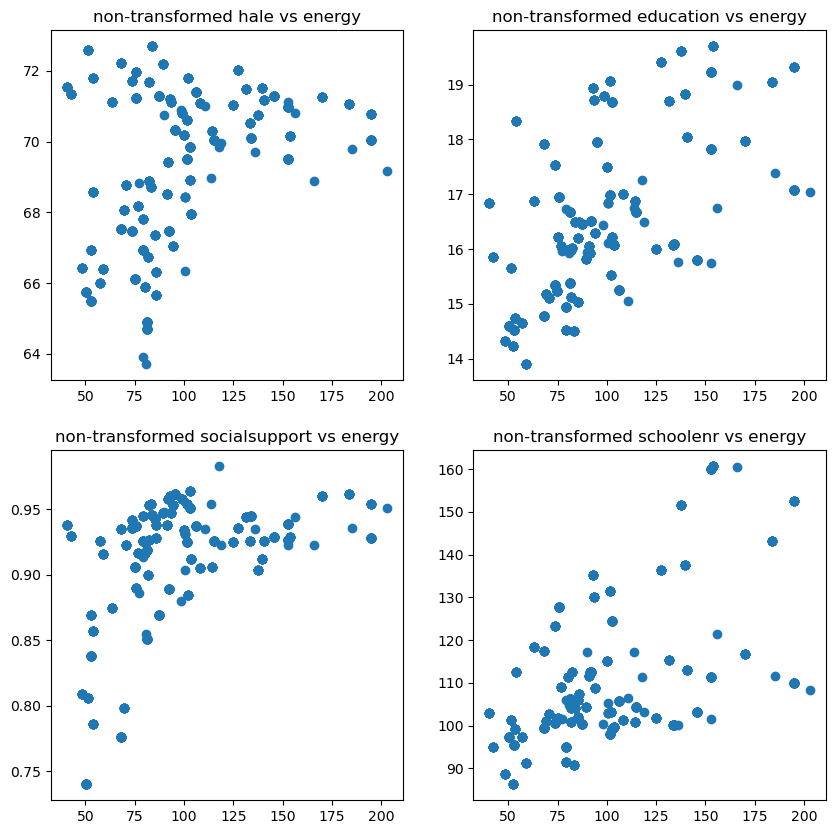

In [1108]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(foundational_df_no_transformations_no_outliers["energy"], foundational_df_no_transformations_no_outliers["hale"])
axs[0, 0].set_title('non-transformed hale vs energy')
axs[0, 1].scatter(foundational_df_no_transformations_no_outliers["energy"], foundational_df_no_transformations_no_outliers["education"])
axs[0, 1].set_title('non-transformed education vs energy')
axs[1, 0].scatter(foundational_df_no_transformations_no_outliers["energy"], foundational_df_no_transformations_no_outliers["socialsupport"])
axs[1, 0].set_title('non-transformed socialsupport vs energy')
axs[1, 1].scatter(foundational_df_no_transformations_no_outliers["energy"], foundational_df_no_transformations_no_outliers["schoolenr"])
axs[1, 1].set_title('non-transformed schoolenr vs energy')

In [1109]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
import numpy as np

In [1110]:
def get_extreme_points(x, y, lower_percentile, upper_percentile):
    # Extreme points
    low_x, high_x = np.percentile(x, [lower_percentile, upper_percentile])
    low_y, high_y = np.percentile(y, [lower_percentile, upper_percentile])
    extreme_indices = np.where((x <= low_x) | (x >= high_x) | (y <= low_y) | (y >= high_y))[0]
    return extreme_indices

def get_middle_points(x, y, n_middle):
    median_x = np.median(x)
    median_y = np.median(y)
    distances = np.sqrt((x - median_x)**2 + (y - median_y)**2)
    middle_indices = np.argsort(distances)[:n_middle]
    return middle_indices

In [1111]:

def plot_with_countries(df, ax, x_var, y_var, title, save_to_file=False, lower_percentile=2.5, upper_percentile=97.5, n_middle=2, highlight_selected=[]):
    x = df[x_var].to_numpy()
    y = df[y_var].to_numpy()
    ax.scatter(x, y)
    ax.set_title(title)
    texts = []
    extreme_indices = get_extreme_points(x, y, lower_percentile, upper_percentile)
    middle_indices = get_middle_points(x, y, n_middle)
    combined_indices = np.unique(np.concatenate([extreme_indices, middle_indices]))
    for index in combined_indices:
        row = df.iloc[index]
        texts.append(ax.text(row[x_var], row[y_var], f"{row['geo']} {row['TIME_PERIOD']}"))
    for selected in highlight_selected:
        selected_row = df[(df['geo'] == selected)]
        if len(selected_row) > 0:
            selected_row = selected_row.iloc[0]
            texts.append(ax.text(selected_row[x_var], selected_row[y_var], f"{selected_row['geo']} {selected_row['TIME_PERIOD']}"))
    adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle="->", color='green'))
    ax.set_xlabel(x_var)
    ax.set_ylabel(y_var)
    if save_to_file:
        plt.savefig(f'./output/figures/exploratory/{title}.png')

In [1112]:
foundational_df_no_transformations_no_outliers['foundational'].mean() 

0.44220317251689417

In [1113]:
no_transformations_df_2008 = foundational_df_no_transformations_no_outliers[foundational_df_no_transformations_no_outliers['TIME_PERIOD'] == 2008]
no_transformations_df_2012 = foundational_df_no_transformations_no_outliers[foundational_df_no_transformations_no_outliers['TIME_PERIOD'] == 2012]
no_transformations_df_2016 = foundational_df_no_transformations_no_outliers[foundational_df_no_transformations_no_outliers['TIME_PERIOD'] == 2016]
no_transformations_df_2020 = foundational_df_no_transformations_no_outliers[foundational_df_no_transformations_no_outliers['TIME_PERIOD'] == 2020]

no_transformations_df_2008_exiobase = foundational_df_no_transformations_no_outliers_exiobase[foundational_df_no_transformations_no_outliers_exiobase['TIME_PERIOD'] == 2008]
no_transformations_df_2012_exiobase = foundational_df_no_transformations_no_outliers_exiobase[foundational_df_no_transformations_no_outliers_exiobase['TIME_PERIOD'] == 2012]
no_transformations_df_2016_exiobase = foundational_df_no_transformations_no_outliers_exiobase[foundational_df_no_transformations_no_outliers_exiobase['TIME_PERIOD'] == 2016]
no_transformations_df_2020_exiobase = foundational_df_no_transformations_no_outliers_exiobase[foundational_df_no_transformations_no_outliers_exiobase['TIME_PERIOD'] == 2020]

In [1114]:
# compare means
no_transformations_df_2008['energy'].mean(), no_transformations_df_2012['energy'].mean(), no_transformations_df_2016['energy'].mean(), no_transformations_df_2020['energy'].mean()



(106.02091523032793, 100.88972228159209, 98.76513600010954, 89.68483302654877)

KeyboardInterrupt: 

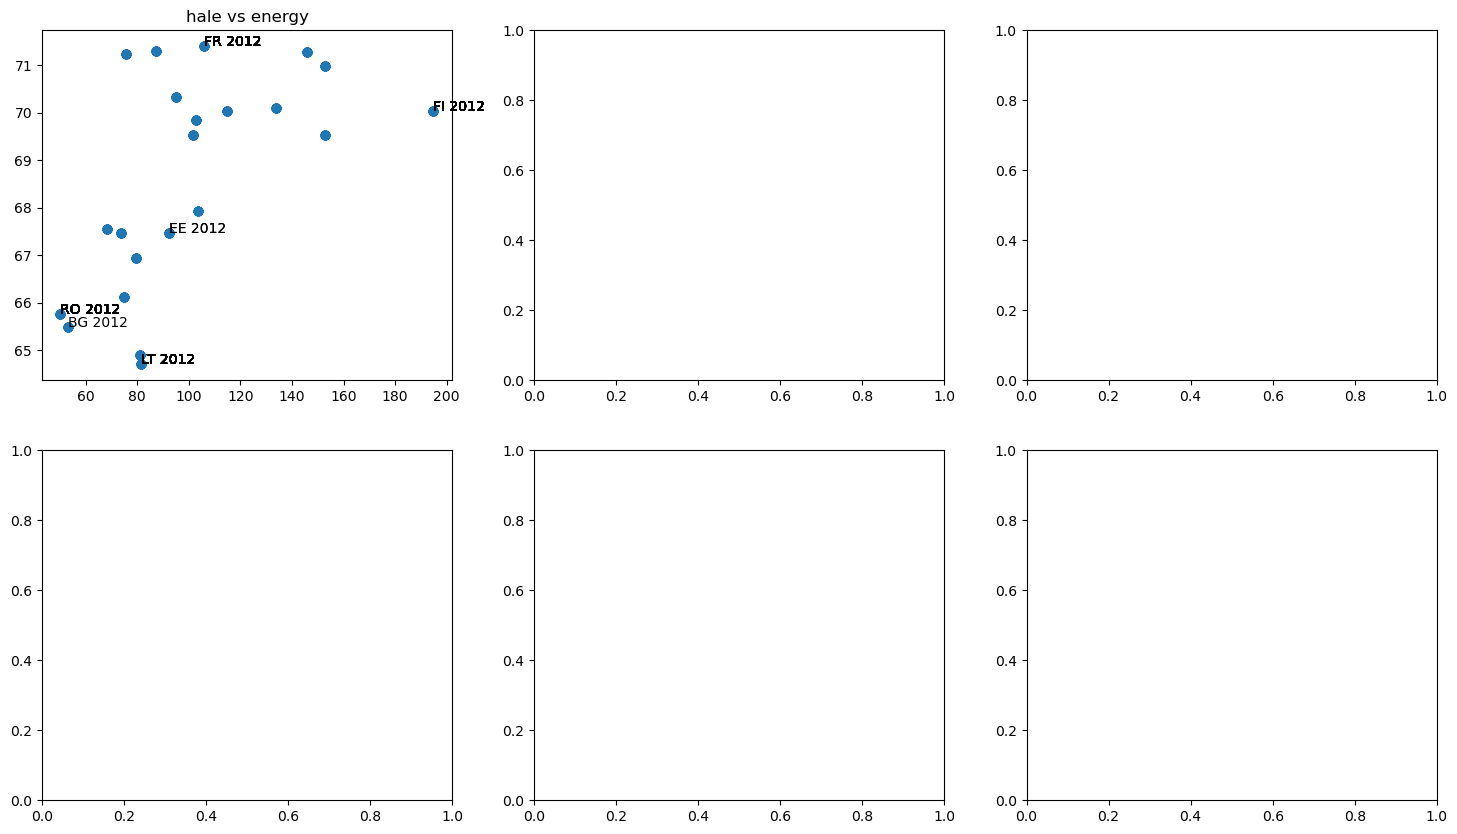

In [1115]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))


plot_with_countries(no_transformations_df_2012, axs[0, 0], 'energy', 'hale', 'hale vs energy', highlight_selected=['FI', 'BG'])
plot_with_countries(no_transformations_df_2012, axs[0, 1], 'energy', 'education', 'education vs energy', highlight_selected=['FI', 'BG'])
plot_with_countries(no_transformations_df_2012, axs[0, 2], 'energy', 'socialsupport', 'socialsupport vs energy', highlight_selected=['FI', 'BG'])

plot_with_countries(no_transformations_df_2020, axs[0, 0], 'energy', 'hale', 'hale vs energy, 2012 and 2020, (IEA data)', highlight_selected=['FI', 'BG'])
plot_with_countries(no_transformations_df_2020, axs[0, 1], 'energy', 'education', 'education vs energy, 2012 and 2020, (IEA data)', highlight_selected=['FI', 'BG'])
plot_with_countries(no_transformations_df_2020, axs[0, 2], 'energy', 'socialsupport', 'socialsupport vs energy, 2012 and 2020, (IEA data)', highlight_selected=['FI', 'BG'])


plot_with_countries(no_transformations_df_2012_exiobase, axs[1, 0], 'energy', 'hale', 'hale vs energy', highlight_selected=['FI', 'BG'])
plot_with_countries(no_transformations_df_2012_exiobase, axs[1, 1], 'energy', 'education', 'education vs energy', highlight_selected=['FI', 'BG'])
plot_with_countries(no_transformations_df_2012_exiobase, axs[1, 2], 'energy', 'socialsupport', 'socialsupport vs energy', highlight_selected=['FI', 'BG'])

plot_with_countries(no_transformations_df_2020_exiobase, axs[1, 0], 'energy', 'hale', 'hale vs energy, 2012 and 2020, (EXIOBASE data)', highlight_selected=['FI', 'BG'])
plot_with_countries(no_transformations_df_2020_exiobase, axs[1, 1], 'energy', 'education', 'education vs energy, 2012 and 2020, (EXIOBASE data)', highlight_selected=['FI', 'BG'])
plot_with_countries(no_transformations_df_2020_exiobase, axs[1, 2], 'energy', 'socialsupport', 'socialsupport vs energy, 2012 and 2020, (EXIOBASE data)', highlight_selected=['FI', 'BG'])

plt.savefig('./output/figures/exploratory/ns_enu_scatter.png')
plt.tight_layout(pad=3.0)
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


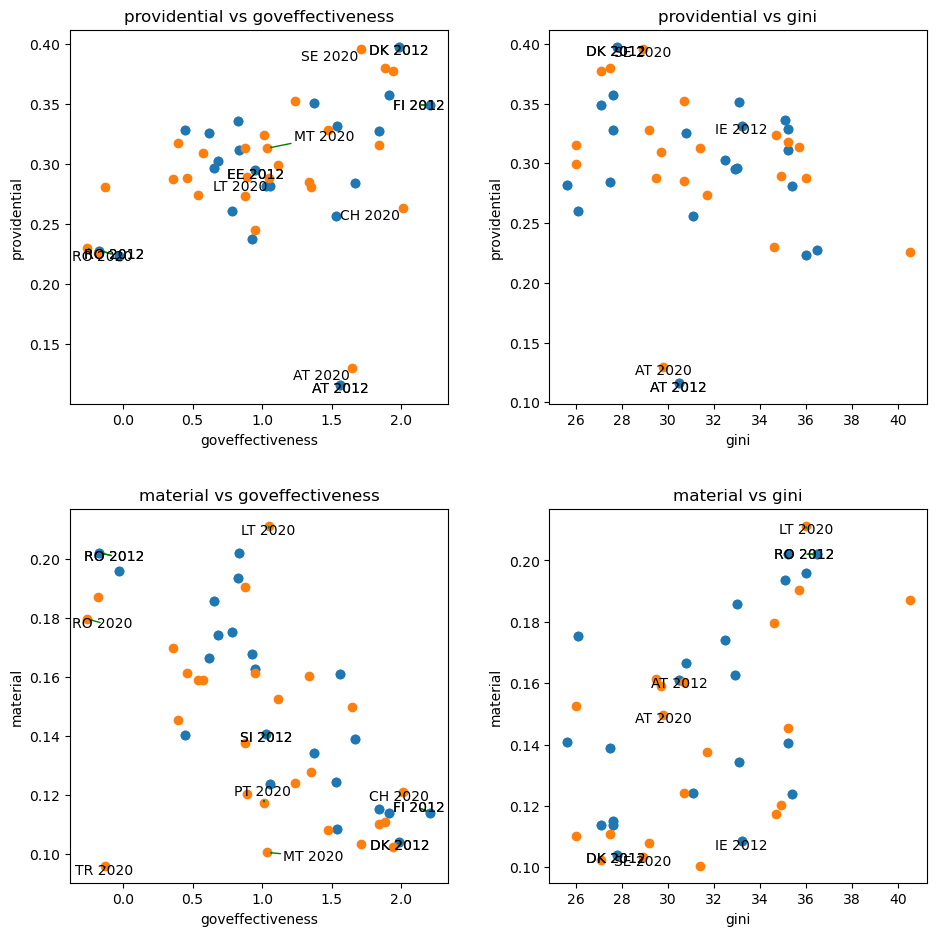

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))


plot_with_countries(no_transformations_df_2012, axs[0, 0], 'goveffectiveness', 'providential', 'providential vs goveffectiveness')
plot_with_countries(no_transformations_df_2020, axs[0, 0], 'goveffectiveness', 'providential', 'providential vs goveffectiveness')

plot_with_countries(no_transformations_df_2012, axs[0, 1], 'gini', 'providential', 'providential vs gini')
plot_with_countries(no_transformations_df_2020, axs[0, 1], 'gini', 'providential', 'providential vs gini')

plot_with_countries(no_transformations_df_2012, axs[1, 0], 'goveffectiveness', 'material', 'material vs goveffectiveness')
plot_with_countries(no_transformations_df_2020, axs[1, 0], 'goveffectiveness', 'material', 'material vs goveffectiveness')

plot_with_countries(no_transformations_df_2012, axs[1, 1], 'gini', 'material', 'material vs gini')
plot_with_countries(no_transformations_df_2020, axs[1, 1], 'gini', 'material', 'material vs gini')

plt.savefig('./output/figures/exploratory/pf_misc_scatter.png')
plt.tight_layout(pad=3.0)
plt.show()

In [ ]:
# format float columns [material, providential, overlooked, other, foundational, nonfoundational] as percentage and round to 2 decimal places
test = no_transformations_df_2016[['geo', 'TIME_PERIOD', 'material', 'providential', 'overlooked', 'other', 'foundational', 'nonfoundational']].copy()
test[['material', 'providential', 'overlooked', 'other', 'foundational', 'nonfoundational']] = test[['material', 'providential', 'overlooked', 'other', 'foundational', 'nonfoundational']] * 100
test = test.round(2)
# save to csv
test.to_csv('output/tables/means_2016.csv', index=False)

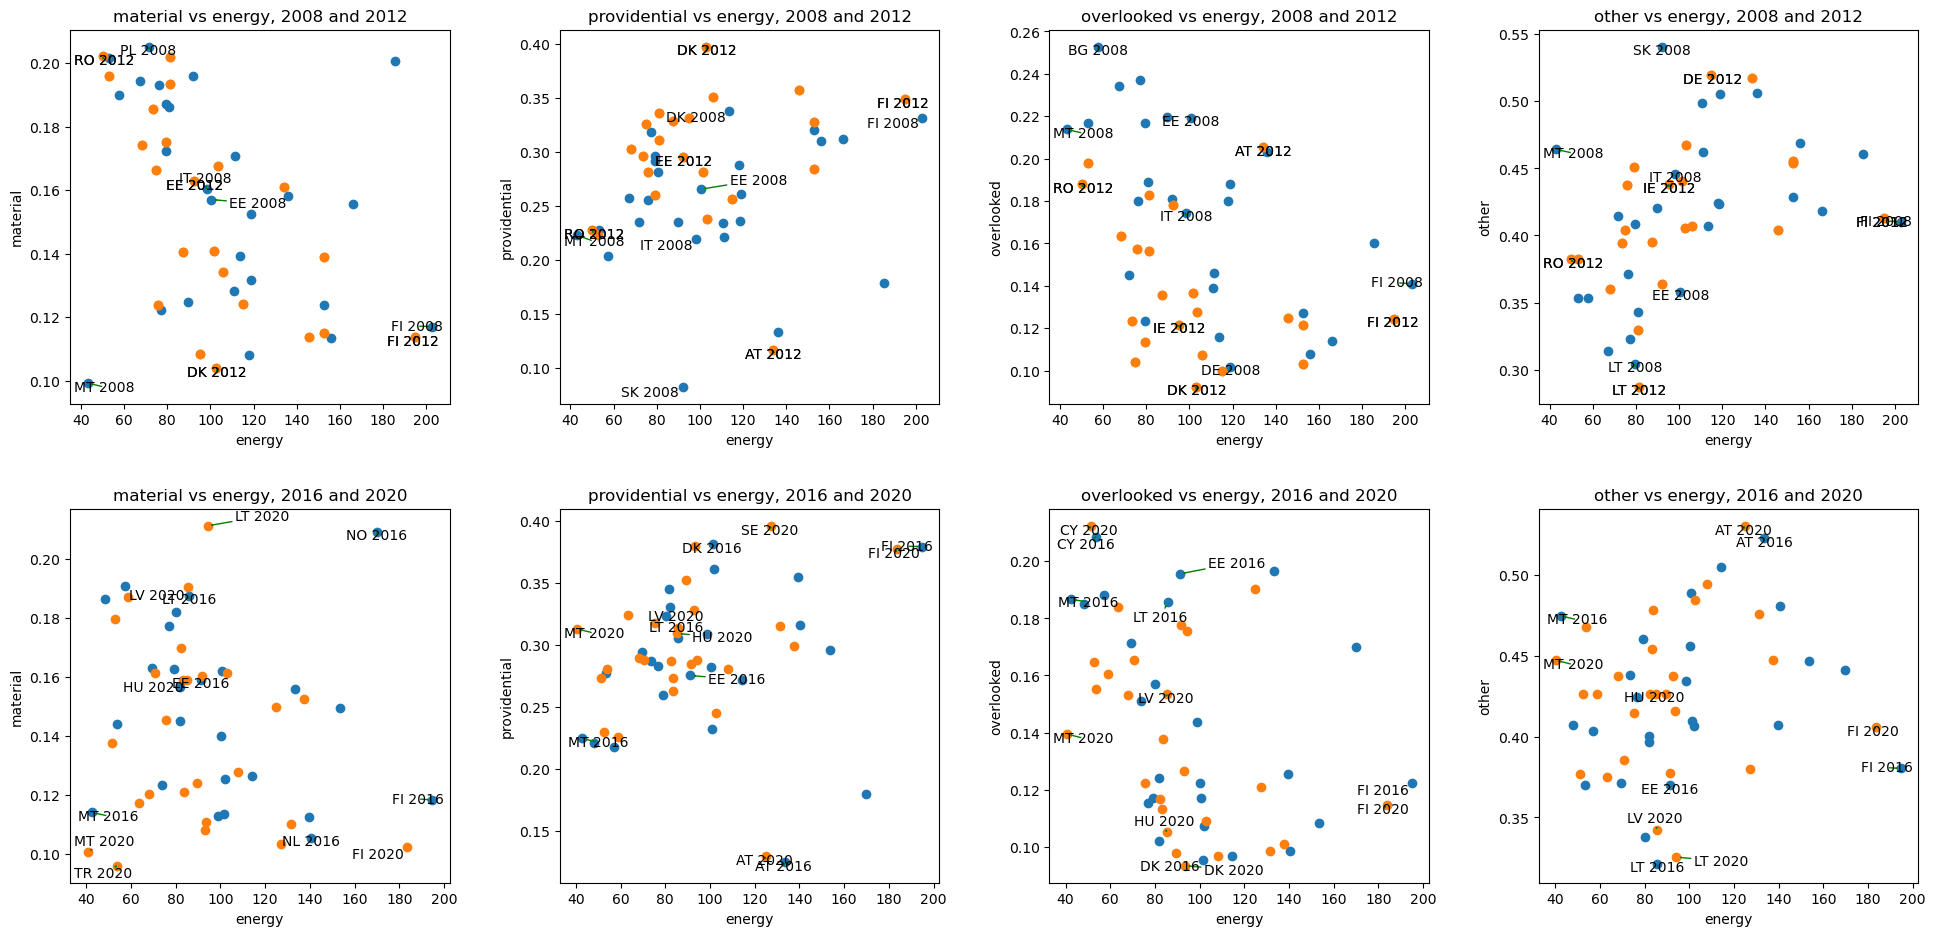

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

plot_with_countries(no_transformations_df_2008, axs[0, 0], 'energy', 'material', 'material vs energy')
plot_with_countries(no_transformations_df_2012, axs[0, 0], 'energy', 'material', 'material vs energy, 2008 and 2012')
plot_with_countries(no_transformations_df_2016, axs[1, 0], 'energy', 'material', 'material vs energy')
plot_with_countries(no_transformations_df_2020, axs[1, 0], 'energy', 'material', 'material vs energy, 2016 and 2020')

plot_with_countries(no_transformations_df_2008, axs[0, 1], 'energy', 'providential', 'providential vs energy')
plot_with_countries(no_transformations_df_2012, axs[0, 1], 'energy', 'providential', 'providential vs energy, 2008 and 2012')
plot_with_countries(no_transformations_df_2016, axs[1, 1], 'energy', 'providential', 'providential vs energy')
plot_with_countries(no_transformations_df_2020, axs[1, 1], 'energy', 'providential', 'providential vs energy, 2016 and 2020')

plot_with_countries(no_transformations_df_2008, axs[0, 2], 'energy', 'overlooked', 'overlooked vs energy')
plot_with_countries(no_transformations_df_2012, axs[0, 2], 'energy', 'overlooked', 'overlooked vs energy, 2008 and 2012')
plot_with_countries(no_transformations_df_2016, axs[1, 2], 'energy', 'overlooked', 'overlooked vs energy')
plot_with_countries(no_transformations_df_2020, axs[1, 2], 'energy', 'overlooked', 'overlooked vs energy, 2016 and 2020')

plot_with_countries(no_transformations_df_2008, axs[0, 3], 'energy', 'other', 'other vs energy')
plot_with_countries(no_transformations_df_2012, axs[0, 3], 'energy', 'other', 'other vs energy, 2008 and 2012')
plot_with_countries(no_transformations_df_2016, axs[1, 3], 'energy', 'other', 'other vs energy')
plot_with_countries(no_transformations_df_2020, axs[1, 3], 'energy', 'other', 'other vs energy, 2016 and 2020')

plt.savefig('./output/figures/exploratory/pf_enu_scatter.png')
plt.tight_layout(pad=3.0)
plt.show()

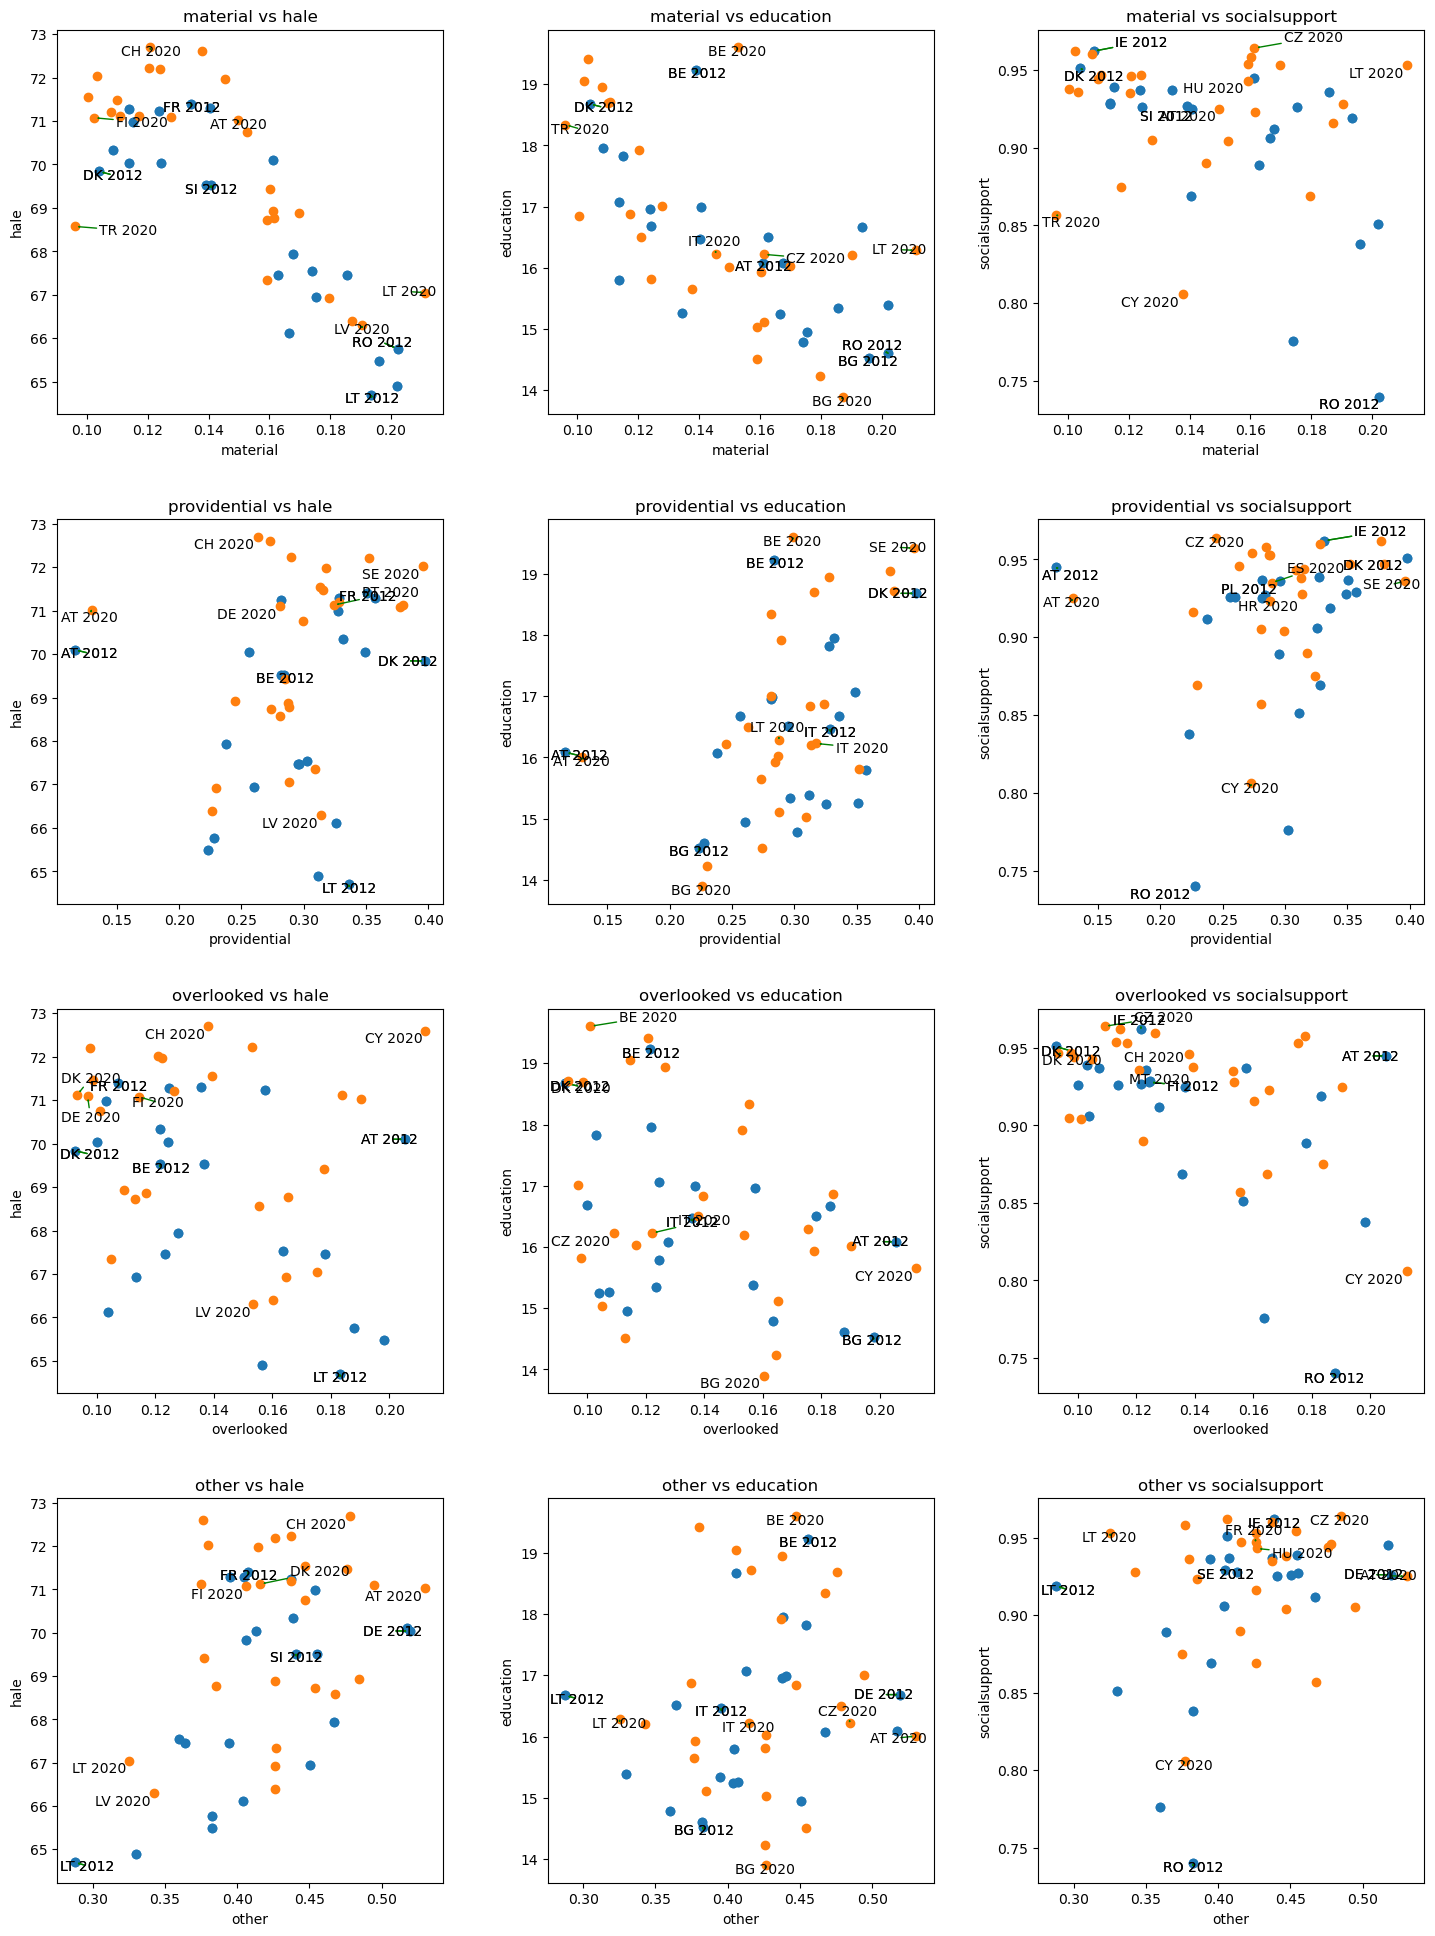

In [ ]:
fig, axs = plt.subplots(4, 3, figsize=(15, 20))

plot_with_countries(no_transformations_df_2012, axs[0, 0], 'material', 'hale', 'material vs hale')
plot_with_countries(no_transformations_df_2020, axs[0, 0], 'material', 'hale', 'material vs hale')
plot_with_countries(no_transformations_df_2012, axs[0, 1], 'material', 'education', 'material vs education')
plot_with_countries(no_transformations_df_2020, axs[0, 1], 'material', 'education', 'material vs education')
plot_with_countries(no_transformations_df_2012, axs[0, 2], 'material', 'socialsupport', 'material vs socialsupport')
plot_with_countries(no_transformations_df_2020, axs[0, 2], 'material', 'socialsupport', 'material vs socialsupport')

plot_with_countries(no_transformations_df_2012, axs[1, 0], 'providential', 'hale', 'providential vs hale')
plot_with_countries(no_transformations_df_2020, axs[1, 0], 'providential', 'hale', 'providential vs hale')
plot_with_countries(no_transformations_df_2012, axs[1, 1], 'providential', 'education', 'providential vs education')
plot_with_countries(no_transformations_df_2020, axs[1, 1], 'providential', 'education', 'providential vs education')
plot_with_countries(no_transformations_df_2012, axs[1, 2], 'providential', 'socialsupport', 'providential vs socialsupport')
plot_with_countries(no_transformations_df_2020, axs[1, 2], 'providential', 'socialsupport', 'providential vs socialsupport')

plot_with_countries(no_transformations_df_2012, axs[2, 0], 'overlooked', 'hale', 'overlooked vs hale')
plot_with_countries(no_transformations_df_2020, axs[2, 0], 'overlooked', 'hale', 'overlooked vs hale')
plot_with_countries(no_transformations_df_2012, axs[2, 1], 'overlooked', 'education', 'overlooked vs education')
plot_with_countries(no_transformations_df_2020, axs[2, 1], 'overlooked', 'education', 'overlooked vs education')
plot_with_countries(no_transformations_df_2012, axs[2, 2], 'overlooked', 'socialsupport', 'overlooked vs socialsupport')
plot_with_countries(no_transformations_df_2020, axs[2, 2], 'overlooked', 'socialsupport', 'overlooked vs socialsupport')

plot_with_countries(no_transformations_df_2012, axs[3, 0], 'other', 'hale', 'other vs hale')
plot_with_countries(no_transformations_df_2020, axs[3, 0], 'other', 'hale', 'other vs hale')
plot_with_countries(no_transformations_df_2012, axs[3, 1], 'other', 'education', 'other vs education')
plot_with_countries(no_transformations_df_2020, axs[3, 1], 'other', 'education', 'other vs education')
plot_with_countries(no_transformations_df_2012, axs[3, 2], 'other', 'socialsupport', 'other vs socialsupport')
plot_with_countries(no_transformations_df_2020, axs[3, 2], 'other', 'socialsupport', 'other vs socialsupport')

plt.savefig('./output/figures/exploratory/pf_ns_scatter.png')
plt.tight_layout(pad=3.0)
plt.show()

In [ ]:
no_transformations_df_at = foundational_df_no_transformations_no_outliers[foundational_df_no_transformations_no_outliers['geo'] == 'AT']
no_transformation_df_ro = foundational_df_no_transformations_no_outliers[foundational_df_no_transformations_no_outliers['geo'] == 'RO']
no_transformations_df_fi = foundational_df_no_transformations_no_outliers[foundational_df_no_transformations_no_outliers['geo'] == 'FI']
no_transformations_df_fr = foundational_df_no_transformations_no_outliers[foundational_df_no_transformations_no_outliers['geo'] == 'FR']
no_transformations_df_it = foundational_df_no_transformations_no_outliers[foundational_df_no_transformations_no_outliers['geo'] == 'IT']
no_transformations_df_de = foundational_df_no_transformations_no_outliers[foundational_df_no_transformations_no_outliers['geo'] == 'DE']

In [ ]:
no_transformation_df_ro['socialsupport']

119      NaN
120    0.740
121    0.740
122    0.809
123    0.869
Name: socialsupport, dtype: float64

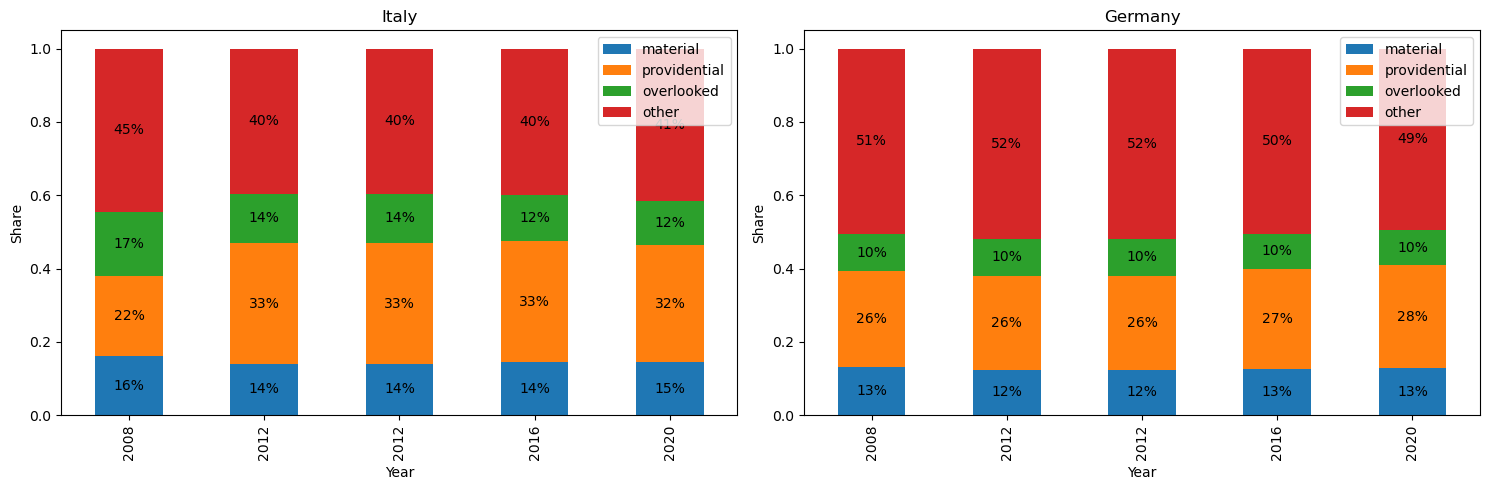

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# stacked bar plot by country with TIME_PERIOD on x axis and shares of material, providential, overlooked, and other on y
def plot_stacked_bar(df, ax, title, save_to_file=False):
    df = df[['material', 'providential', 'overlooked', 'other', 'TIME_PERIOD']]
    df = df.set_index('TIME_PERIOD')
    df = df.div(df.sum(axis=1), axis=0)
    df.plot(kind='bar', stacked=True, ax=ax)
    # add the value in the middle of the bar
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.text(x+width/2,
                y+height/2,
                '{:.0%}'.format(height),
                horizontalalignment='center',
                verticalalignment='center')
    ax.set_title(title)
    ax.set_xlabel('Year')
    ax.set_ylabel('Share')
    if save_to_file:
        plt.savefig(f'./output/figures/exploratory/{title}_stacked.png')
    
# plot_stacked_bar(no_transformations_df_at, axs[0], 'Austria')
plot_stacked_bar(no_transformations_df_it, axs[0], 'Italy')
plot_stacked_bar(no_transformations_df_de, axs[1], 'Germany')
# plot_stacked_bar(no_transformation_df_ro, axs[1], 'Romania')
# plot_stacked_bar(no_transformations_df_fr, axs[2], 'France')
# plot_stacked_bar(no_transformations_df_fi, axs[3], 'Finland')

# currently the label is cut off, need more space at the bottom
fig.tight_layout()
plt.savefig('./output/figures/exploratory/pf_enu_stacked_selected_countries_new.png')
plt.show()

In [ ]:
import pycountry
def convert_iso2_to_iso3(iso2_code):
    country = pycountry.countries.get(alpha_2=iso2_code)
    return country.alpha_3 if country else None

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# blues = plt.cm.get_cmap('Blues', 256)

# # Create a new color map that starts from a midpoint of the original 'Blues' to use darker colors
# start = 0.3  # Start from the middle of the color map
# stop = 1.0  # End at the darkest color
# blues_custom = mcolors.LinearSegmentedColormap.from_list(
#     'truncated_blues', 
#     blues(np.linspace(start, stop, 256))
# )

def plot_on_map(df, ax, title, world_df, column_name, save_to_file=False, label=None, orientation='horizontal', cmap='Blues', color_threshold=0.2, vmin=0, vmax=0.3, color_reverse=False):
    df_copy = df.copy()
    df_copy['geo_iso3'] = df_copy['geo'].apply(convert_iso2_to_iso3)
    world_copy = world_df.copy()
    world_with_data = world_copy.merge(df_copy, left_on='iso_a3', right_on='geo_iso3')
    world_with_data.plot(column=column_name, ax=ax,
                             legend_kwds={'label': label, 'orientation': orientation}, cmap=cmap, vmin=vmin, vmax=vmax)
    ax.set_xticks([])
    ax.set_yticks([])

    # Set plot limits
    x_min, x_max = -10, 30
    y_min, y_max = 34, 72

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    for idx, row in world_with_data.iterrows():
        color = 'white' if color_reverse else 'black'
        if row[column_name] > color_threshold:
            color = 'black' if color_reverse else 'white'
        xcoord = row.geometry.centroid.x
        ycoord = row.geometry.centroid.y
        
        # Ensure the text coordinates are within the plot bounds
        xcoord = max(min(xcoord, x_max), x_min)
        ycoord = max(min(ycoord, y_max), y_min)

        if x_min <= xcoord <= x_max -2 and y_min <= ycoord <= y_max -2:
            # Move countries that have weird coordinates
            if row['geo'] == 'FR':
                    ax.text(2.5, 47, f"{row[column_name]:.2f}", fontsize=8, color=color)
            if row['geo'] == 'SE':
                    ax.text(15, 65, f"{row[column_name]:.2f}", fontsize=8, color=color)
            # if Norway, color is always black
            elif row['geo'] == 'NO':
                ax.text(xcoord, ycoord, f"{row[column_name]:.2f}", fontsize=8, color='black')
            else:
                ax.text(xcoord, ycoord, f"{row[column_name]:.2f}", fontsize=8, color=color)

    ax.set_title(title)
    if save_to_file:
        plt.savefig(f'./output/figures/exploratory/{title}_map.png')

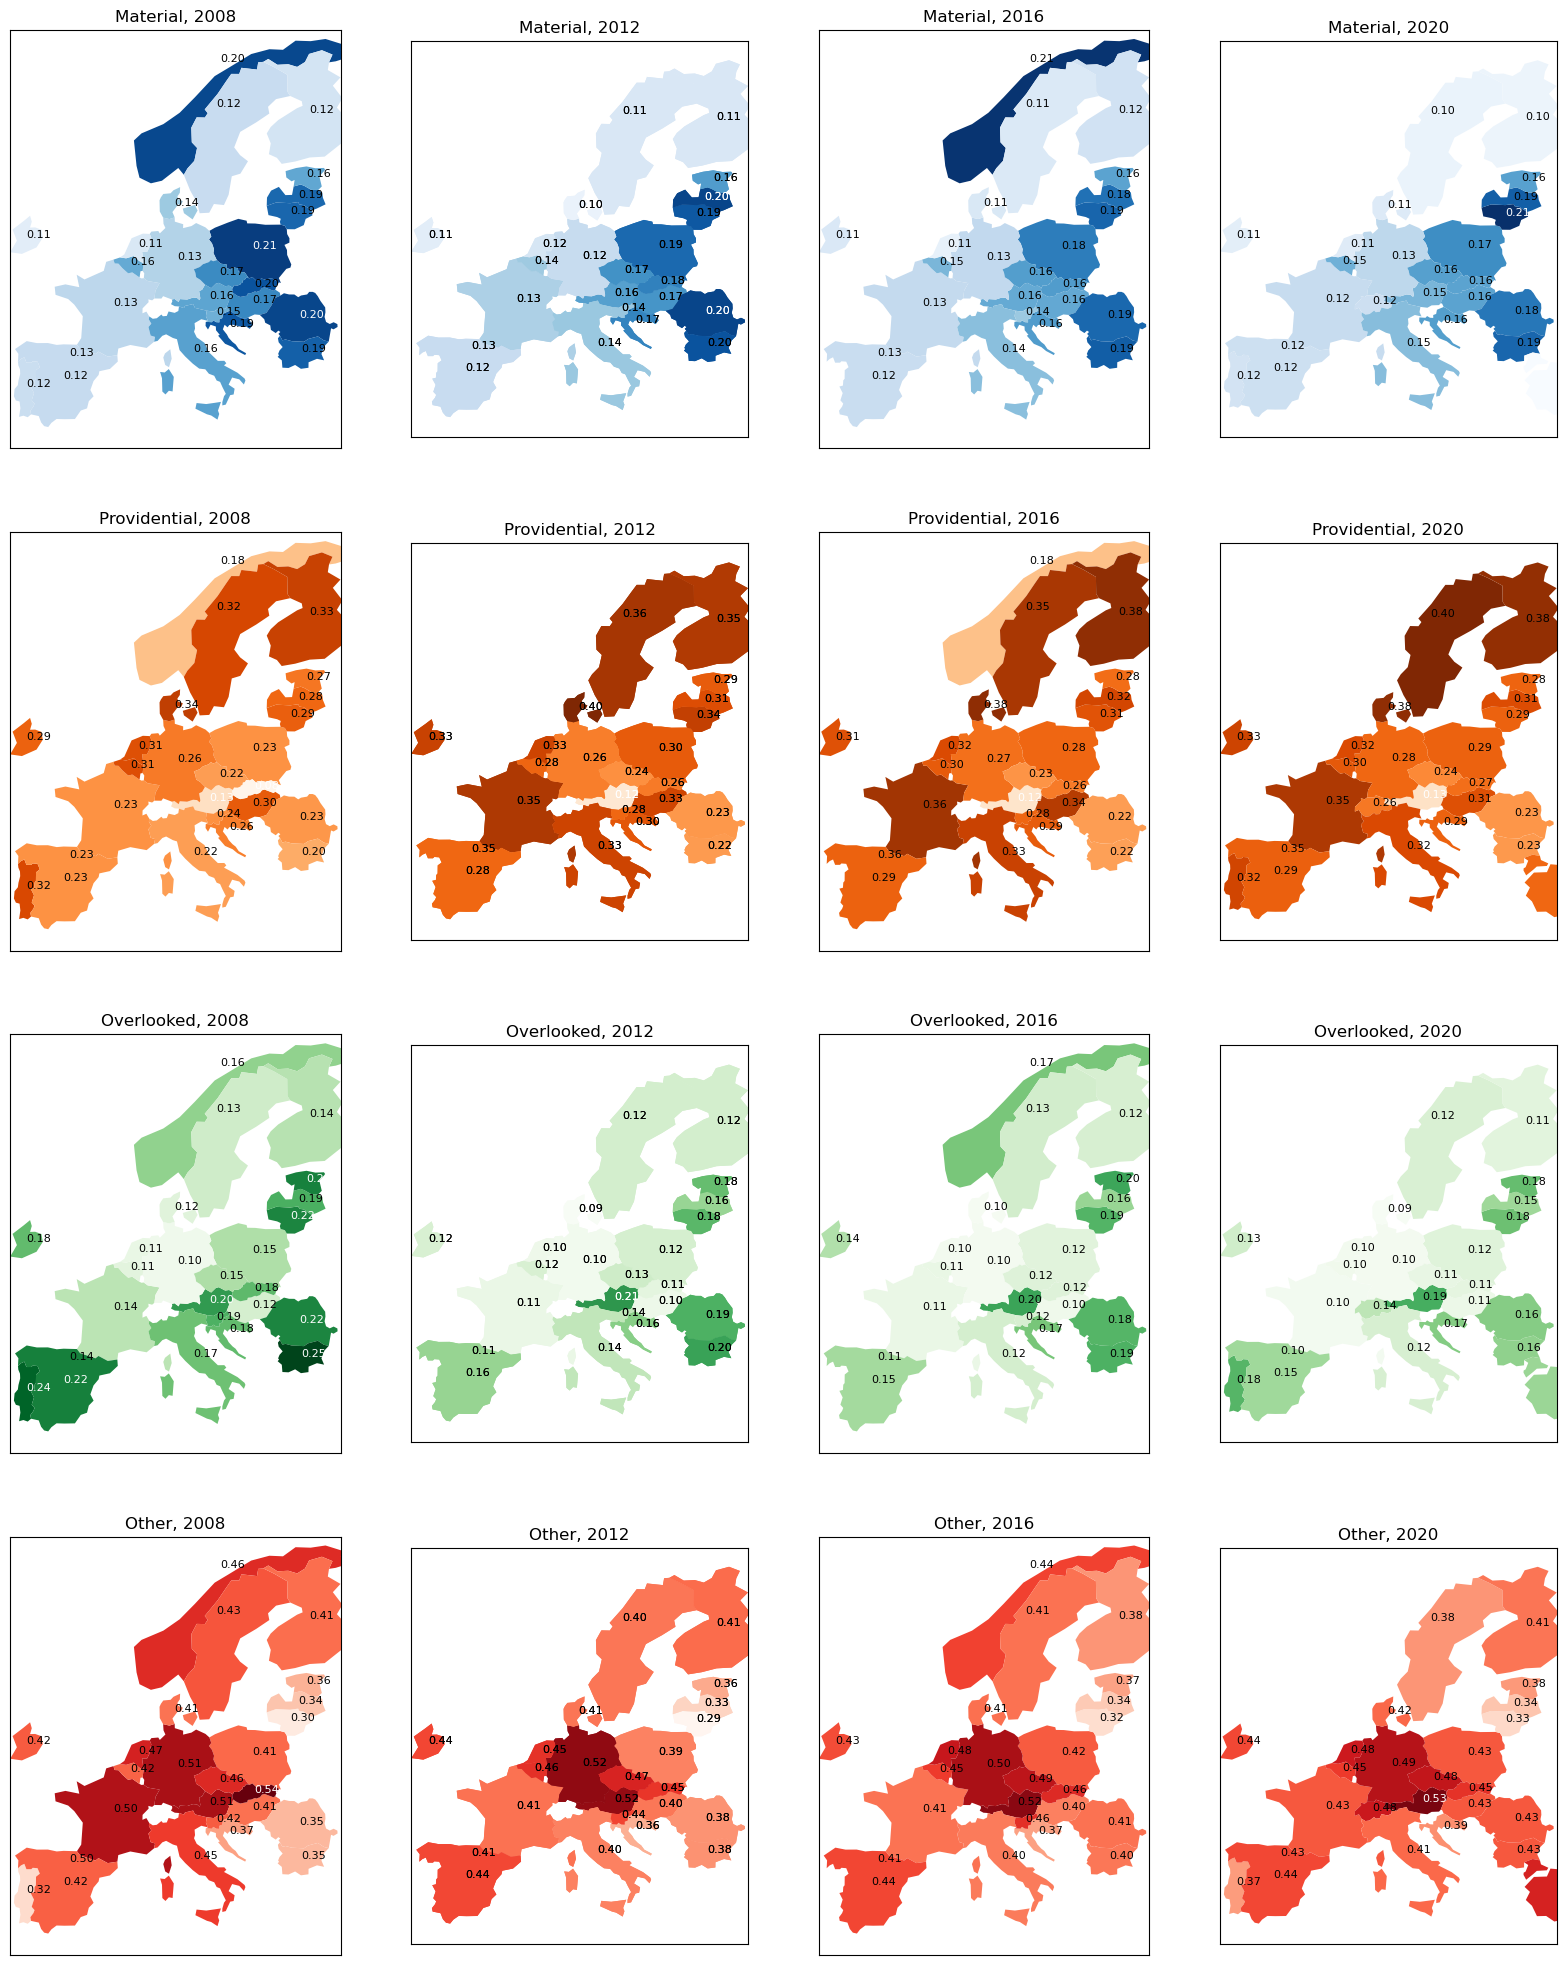

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(20, 25))

# get vmin and vmax from foundational_df_no_transformations_no_outliers for a given column
material_vmin = foundational_df_no_transformations_no_outliers['material'].min()
material_vmax = foundational_df_no_transformations_no_outliers['material'].max()
providential_vmin = foundational_df_no_transformations_no_outliers['providential'].min()
providential_vmax = foundational_df_no_transformations_no_outliers['providential'].max()
overlooked_vmin = foundational_df_no_transformations_no_outliers['overlooked'].min()
overlooked_vmax = foundational_df_no_transformations_no_outliers['overlooked'].max()
other_vmin = foundational_df_no_transformations_no_outliers['other'].min()
other_vmax = foundational_df_no_transformations_no_outliers['other'].max()

plot_on_map(no_transformations_df_2008, axs[0, 0], 'Material, 2008', world, 'material', label='Material', orientation='vertical', cmap='Blues', vmin=material_vmin, vmax=material_vmax)
plot_on_map(no_transformations_df_2012, axs[0, 1], 'Material, 2012', world, 'material', label='Material', orientation='vertical', cmap='Blues', vmin=material_vmin, vmax=material_vmax)
plot_on_map(no_transformations_df_2016, axs[0, 2], 'Material, 2016', world, 'material', label='Material', orientation='vertical', cmap='Blues', vmin=material_vmin, vmax=material_vmax)
plot_on_map(no_transformations_df_2020, axs[0, 3], 'Material, 2020', world, 'material', label='Material', orientation='vertical', cmap='Blues', vmin=material_vmin, vmax=material_vmax)

plot_on_map(no_transformations_df_2008, axs[1, 0], 'Providential, 2008', world, 'providential', label='Providential', orientation='vertical', cmap='Oranges', vmin=providential_vmin, vmax=providential_vmax, color_reverse=True)
plot_on_map(no_transformations_df_2012, axs[1, 1], 'Providential, 2012', world, 'providential', label='Providential', orientation='vertical', cmap='Oranges', vmin=providential_vmin, vmax=providential_vmax, color_reverse=True)
plot_on_map(no_transformations_df_2016, axs[1, 2], 'Providential, 2016', world, 'providential', label='Providential', orientation='vertical', cmap='Oranges', vmin=providential_vmin, vmax=providential_vmax, color_reverse=True)
plot_on_map(no_transformations_df_2020, axs[1, 3], 'Providential, 2020', world, 'providential', label='Providential', orientation='vertical', cmap='Oranges', vmin=providential_vmin, vmax=providential_vmax, color_reverse=True)

plot_on_map(no_transformations_df_2008, axs[2, 0], 'Overlooked, 2008', world, 'overlooked', label='Overlooked', orientation='vertical', cmap='Greens', vmin=overlooked_vmin, vmax=overlooked_vmax)
plot_on_map(no_transformations_df_2012, axs[2, 1], 'Overlooked, 2012', world, 'overlooked', label='Overlooked', orientation='vertical', cmap='Greens', vmin=overlooked_vmin, vmax=overlooked_vmax)
plot_on_map(no_transformations_df_2016, axs[2, 2], 'Overlooked, 2016', world, 'overlooked', label='Overlooked', orientation='vertical', cmap='Greens', vmin=overlooked_vmin, vmax=overlooked_vmax)
plot_on_map(no_transformations_df_2020, axs[2, 3], 'Overlooked, 2020', world, 'overlooked', label='Overlooked', orientation='vertical', cmap='Greens', vmin=overlooked_vmin, vmax=overlooked_vmax)

plot_on_map(no_transformations_df_2008, axs[3, 0], 'Other, 2008', world, 'other', label='Other', orientation='vertical', cmap='Reds', vmin=other_vmin, vmax=other_vmax, color_threshold=0.53)
plot_on_map(no_transformations_df_2012, axs[3, 1], 'Other, 2012', world, 'other', label='Other', orientation='vertical', cmap='Reds', vmin=other_vmin, vmax=other_vmax, color_threshold=0.53)
plot_on_map(no_transformations_df_2016, axs[3, 2], 'Other, 2016', world, 'other', label='Other', orientation='vertical', cmap='Reds', vmin=other_vmin, vmax=other_vmax, color_threshold=0.53)
plot_on_map(no_transformations_df_2020, axs[3, 3], 'Other, 2020', world, 'other', label='Other', orientation='vertical', cmap='Reds', vmin=other_vmin, vmax=other_vmax, color_threshold=0.53)

# plt.tight_layout(pad=3.0)
plt.savefig('./output/figures/exploratory/pf_maps.png')
plt.show()

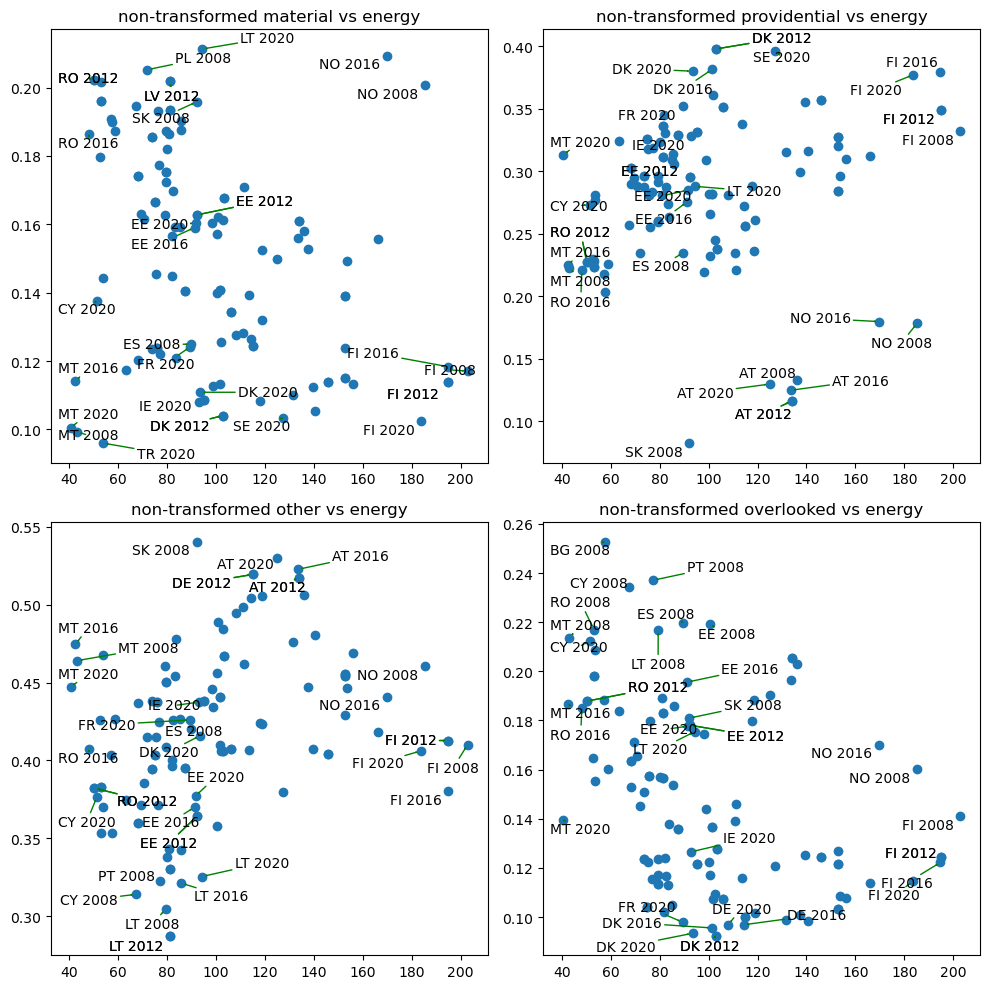

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, (y_var, title) in enumerate(zip(['material', 'providential', 'other', 'overlooked'],
                                       ['non-transformed material vs energy',
                                        'non-transformed providential vs energy',
                                        'non-transformed other vs energy',
                                        'non-transformed overlooked vs energy'])):
    ax = axs[i//2, i%2]
    x = foundational_df_no_transformations_no_outliers["energy"].to_numpy()
    y = foundational_df_no_transformations_no_outliers[y_var].to_numpy()
    ax.scatter(x, y)
    ax.set_title(title)
    
    texts = []
    extreme_indices = get_extreme_points(x, y, 5, 95)
    middle_indices = get_middle_points(x, y, 10)
    combined_indices = np.unique(np.concatenate([extreme_indices, middle_indices]))
    for index in combined_indices:
        row = foundational_df_no_transformations_no_outliers.iloc[index]
        texts.append(ax.text(row['energy'], row[y_var], f"{row['geo']} {row['TIME_PERIOD']}"))

    # Use adjust_text to attempt to reduce text overlap
    adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle="->", color='green'))

plt.tight_layout()
plt.savefig('./output/figures/exploratory/pf_enu_scatter.png')

plt.show()

Text(0.5, 1.0, 'non-transformed schoolenr vs energy')

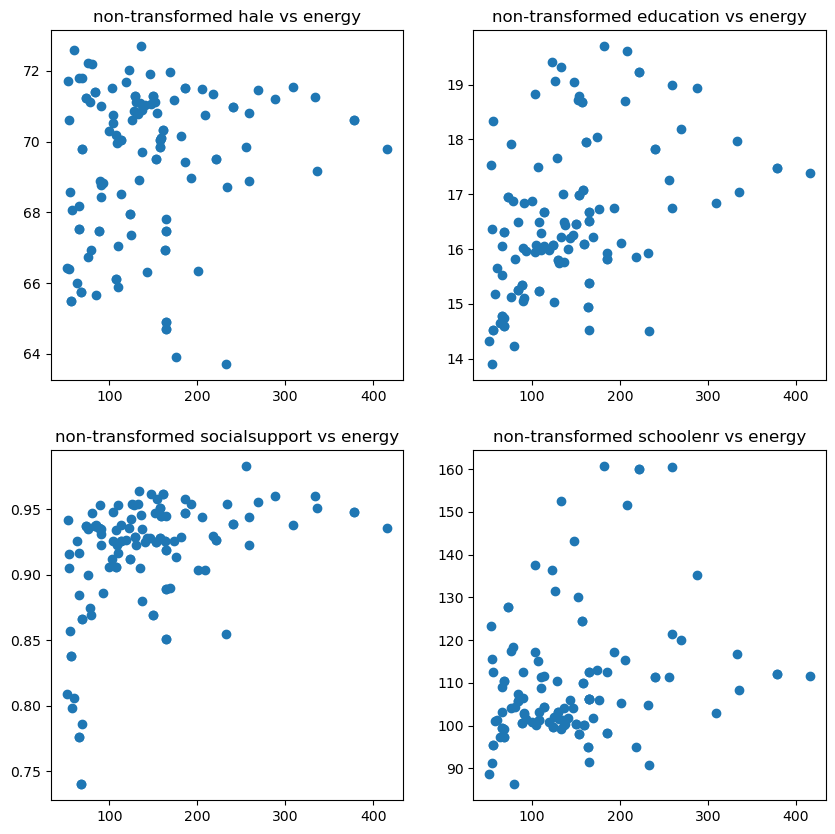

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(foundational_df_no_transformations_no_outliers_exiobase["energy"], foundational_df_no_transformations_no_outliers_exiobase["hale"])
axs[0, 0].set_title('non-transformed hale vs energy')
axs[0, 1].scatter(foundational_df_no_transformations_no_outliers_exiobase["energy"], foundational_df_no_transformations_no_outliers_exiobase["education"])
axs[0, 1].set_title('non-transformed education vs energy')
axs[1, 0].scatter(foundational_df_no_transformations_no_outliers_exiobase["energy"], foundational_df_no_transformations_no_outliers_exiobase["socialsupport"])
axs[1, 0].set_title('non-transformed socialsupport vs energy')
axs[1, 1].scatter(foundational_df_no_transformations_no_outliers_exiobase["energy"], foundational_df_no_transformations_no_outliers_exiobase["schoolenr"])
axs[1, 1].set_title('non-transformed schoolenr vs energy')

Text(0.5, 1.0, 'transformed schoolenr vs energy')

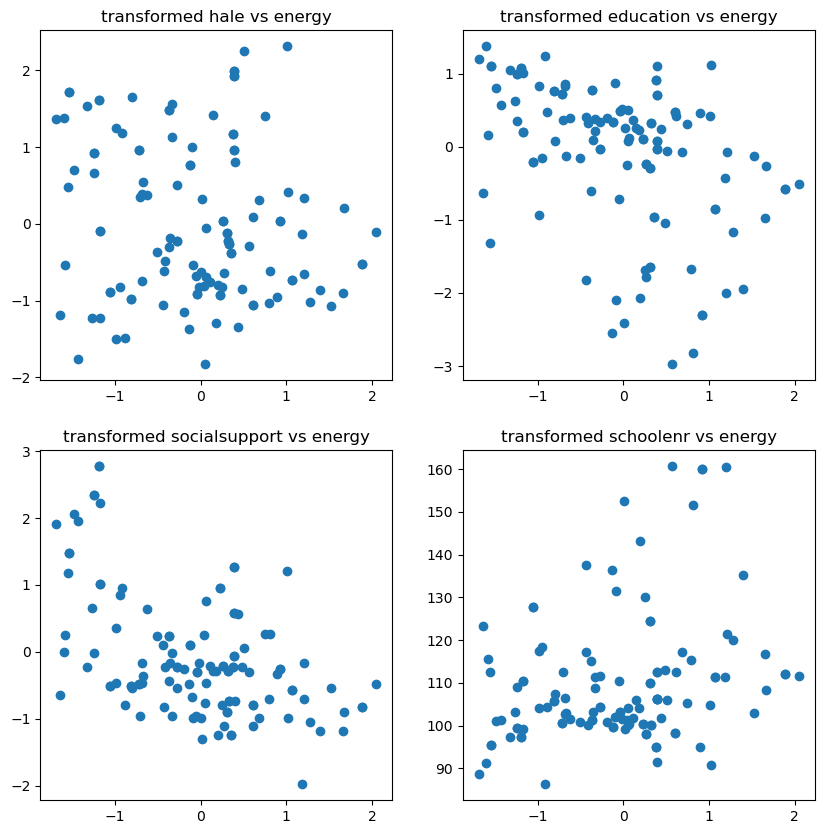

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(foundational_df_transformed_no_outliers_exiobase["energy"], foundational_df_transformed_no_outliers_exiobase["hale"])
axs[0, 0].set_title('transformed hale vs energy')
axs[0, 1].scatter(foundational_df_transformed_no_outliers_exiobase["energy"], foundational_df_transformed_no_outliers_exiobase["education"])
axs[0, 1].set_title('transformed education vs energy')
axs[1, 0].scatter(foundational_df_transformed_no_outliers_exiobase["energy"], foundational_df_transformed_no_outliers_exiobase["socialsupport"])
axs[1, 0].set_title('transformed socialsupport vs energy')
axs[1, 1].scatter(foundational_df_transformed_no_outliers_exiobase["energy"], foundational_df_transformed_no_outliers_exiobase["schoolenr"])
axs[1, 1].set_title('transformed schoolenr vs energy')

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(foundational_df_no_transformations_no_outliers_accounts_exiobase["energy"], foundational_df_no_transformations_no_outliers_accounts_exiobase["hale"])
axs[0, 0].set_title('non-transformed hale vs energy')
axs[0, 1].scatter(foundational_df_no_transformations_no_outliers_accounts_exiobase["energy"], foundational_df_no_transformations_no_outliers_accounts_exiobase["education"])
axs[0, 1].set_title('non-transformed education vs energy')
axs[1, 0].scatter(foundational_df_no_transformations_no_outliers_accounts_exiobase["energy"], foundational_df_no_transformations_no_outliers_accounts_exiobase["socialsupport"])
axs[1, 0].set_title('non-transformed socialsupport vs energy')
axs[1, 1].scatter(foundational_df_no_transformations_no_outliers_accounts_exiobase["energy"], foundational_df_no_transformations_no_outliers_accounts_exiobase["schoolenr"])
axs[1, 1].set_title('non-transformed schoolenr vs energy')

Text(0.5, 1.0, 'non-transformed schoolenr vs energy')

Text(0.5, 1.0, 'transformed schoolenr vs energy')

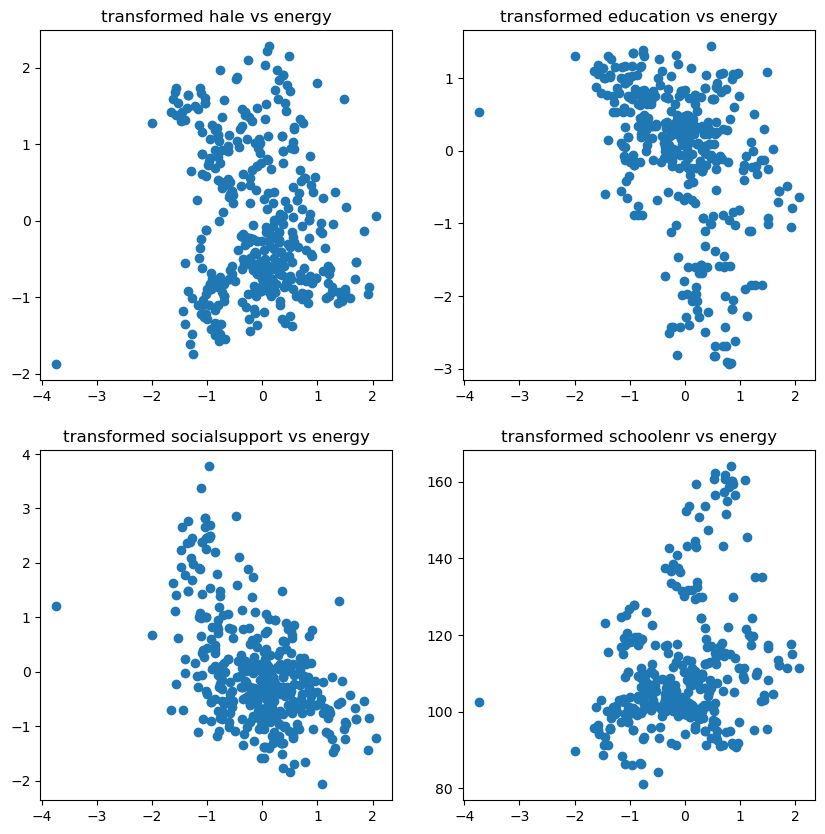

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(foundational_df_transformed_no_outliers_accounts_exiobase["energy"], foundational_df_transformed_no_outliers_accounts_exiobase["hale"])
axs[0, 0].set_title('transformed hale vs energy')
axs[0, 1].scatter(foundational_df_transformed_no_outliers_accounts_exiobase["energy"], foundational_df_transformed_no_outliers_accounts_exiobase["education"])
axs[0, 1].set_title('transformed education vs energy')
axs[1, 0].scatter(foundational_df_transformed_no_outliers_accounts_exiobase["energy"], foundational_df_transformed_no_outliers_accounts_exiobase["socialsupport"])
axs[1, 0].set_title('transformed socialsupport vs energy')
axs[1, 1].scatter(foundational_df_transformed_no_outliers_accounts_exiobase["energy"], foundational_df_transformed_no_outliers_accounts_exiobase["schoolenr"])
axs[1, 1].set_title('transformed schoolenr vs energy')

In [ ]:
# create_scatter_plots_grid(foundational_df_no_transformations_no_outliers, 'TIME_PERIOD', ['overlooked', 'material', 'providential', 'other', 'foundational'], time_periods)

In [ ]:
# foundational_df_no_transformations_no_outliers_accounts_selected_years = foundational_df_no_transformations_no_outliers_accounts[foundational_df_no_transformations_no_outliers_accounts['TIME_PERIOD'].isin(time_periods_accounts)]
# create_scatter_plots_grid(foundational_df_no_transformations_no_outliers_accounts_selected_years, 'TIME_PERIOD', ['overlooked', 'material', 'providential', 'other', 'foundational'], time_periods_accounts)

In [ ]:
create_scatter_plots_grid(foundational_df_no_transformations_exiobase, 'TIME_PERIOD', ['overlooked', 'material', 'providential', 'other', 'foundational'], time_periods)

In [ ]:
foundational_df_no_transformations_no_outliers_accounts_exiobase_selected_years = foundational_df_no_transformations_no_outliers_accounts_exiobase[foundational_df_no_transformations_no_outliers_accounts_exiobase['TIME_PERIOD'].isin(time_periods_accounts)]
create_scatter_plots_grid(foundational_df_no_transformations_no_outliers_accounts_exiobase_selected_years, 'TIME_PERIOD', ['overlooked', 'material', 'providential', 'other', 'foundational'], time_periods_accounts)

## Creating a balanced panel

Balance the dataset by removing countries that don't have data for selected years.


Is the dataset balanced? False
Total number of observations: 788


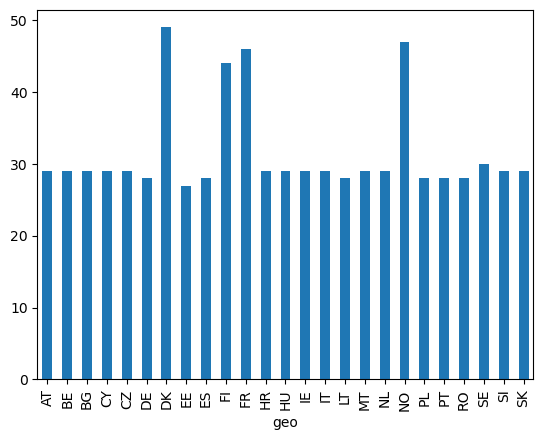

In [ ]:
counts_accounts = foundational_df_transformed_no_outliers_accounts.groupby('geo')['TIME_PERIOD'].count()
counts_accounts.plot(kind='bar')
is_balanced_accounts = counts_accounts.nunique() == 1
print("Is the dataset balanced?", is_balanced_accounts)
total_observations_accounts = foundational_df_transformed_no_outliers_accounts.shape[0]
print("Total number of observations:", total_observations_accounts)

Is the dataset balanced? False
Total number of observations: 121


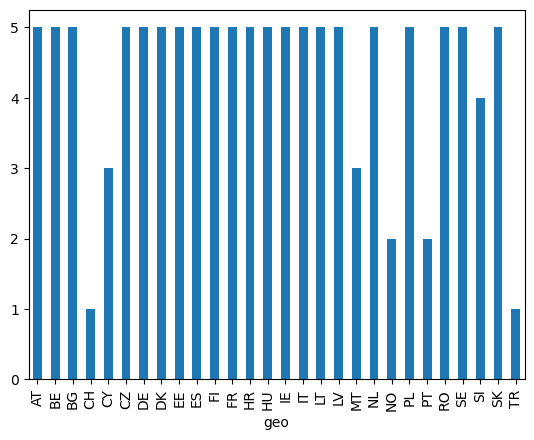

In [ ]:
counts = foundational_df_transformed_no_outliers.groupby('geo')['TIME_PERIOD'].count()
counts.plot(kind='bar')
is_balanced = counts.nunique() == 1
print("Is the dataset balanced?", is_balanced)
total_observations = foundational_df_transformed_no_outliers.shape[0]
print("Total number of observations:", total_observations)

# Reproducing JV analysis with new data

Convenience functions

In [ ]:
def perform_regressions(dataframe, independent_variable, dependent_vars, reg_types, input_assumptions, name):
    regressions = []
    for reg_type in reg_types:
        if len(dependent_vars) == 1:
            model_dict = regression_model_linearmodels(dataframe, independent_variable, dependent_vars[0], reg_type)
        else:
            model_dict = regression_model_linearmodels(dataframe, independent_variable, dependent_vars, reg_type, [dependent_vars])
        reg_type_formatted = reg_type.replace('_', ' ').title()
        
        model_dict['goodness_of_fit'] = analyze_linearmodels_regression_results(model_dict['model'], input_assumptions, f"{reg_type_formatted} {name}", dataframe[independent_variable], reg_type)
        
        model_dict['name'] = f"{reg_type_formatted} {name}"
        model_dict['data'] = dataframe
        model_dict['independent_variable'] = independent_variable
        model_dict['dependent_variables'] = dependent_vars
        
        if reg_type == 'fixed_effects' or reg_type == 'random_effects':
            hausman_test = model_dict['hausman_test'][2]
            if hausman_test < input_assumptions['p_value_threshold']:
                model_dict['hausman_test_pass'] = True
            else:
                model_dict['hausman_test_pass'] = False
            model_dict['hausman_test_p_value'] = hausman_test
        if reg_type == 'fixed_effects':
            f_test = model_dict['f-statistic'].pval
            if f_test < input_assumptions['p_value_threshold']:
                model_dict['f_test_pass'] = True
            else:
                model_dict['f_test_pass'] = False
            model_dict['f_test_p_value'] = f_test
        if reg_type == 'random_effects':
            lm_test = model_dict['breusch_pagan_test']["LM p-val"]
            if lm_test < input_assumptions['p_value_threshold']:
                model_dict['lm_test_pass'] = True
            else:
                model_dict['lm_test_pass'] = False
            model_dict['lm_test_p_value'] = lm_test
        
        regressions.append(model_dict)
            
    return regressions

Always using the same three types of panel regression models

In [ ]:
regression_types = ['pooled_ols', 'fixed_effects', 'random_effects']

# Bivariate regressions

$$
  \widetilde{NS}_i = a + b \widetilde{ENU}_i + e_i
$$

In [ ]:
y_variables = ['hale', 'education', 'socialsupport',  'hospitalbeds', 'infantmortality', 'rail', 'roadinjury', 'suicide', 'housing', 'communicable']
x_variables = ['overlooked', 'material', 'providential', 'other', 'foundational', 'nonfoundational']

In [ ]:
bivariate_regressions_balanced = []
bivariate_regressions_unbalanced = []
bivariate_regressions_balanced_accounts = []
bivariate_regressions_unbalanced_accounts = []
bivariate_regressions_balanced_exiobase = []
bivariate_regressions_unbalanced_exiobase = []
bivariate_regressions_balanced_accounts_exiobase = []
bivariate_regressions_unbalanced_accounts_exiobase = []

In [ ]:
def year_country_tradeoff_table(df, dependent_variable, independent_variables):
    # Combine dependent and independent variables into a single list for checking
    columns_to_check = [dependent_variable] + independent_variables

    # Identify rows with any missing data in the specified columns
    df_non_missing = df.dropna(subset=columns_to_check)

    # For each year, count the number of unique countries that have complete data
    countries_per_year = df_non_missing.groupby('TIME_PERIOD')['geo'].nunique().reset_index()
    countries_per_year.columns = ['Year', 'Number of Countries with Complete Data']

    # Optionally, sort by 'Number of Countries with Complete Data' to see the best years
    countries_per_year = countries_per_year.sort_values(by='Number of Countries with Complete Data', ascending=False)

    return countries_per_year

In [ ]:
def create_datasets(dependent_variable, independent_variables):
    # custom_time_periods_accounts = [year for year in range(2010, 2020)]
    regression_df_unbalanced = create_balanced_panel(foundational_df_transformed_no_outliers, time_periods, dependent_variable, independent_variables, balanced=False)
    regression_df_balanced = create_balanced_panel(foundational_df_transformed_no_outliers, time_periods, dependent_variable, independent_variables, balanced=True)
    # regression_df_unbalanced_accounts = create_balanced_panel(foundational_df_transformed_no_outliers_accounts, time_periods_accounts, dependent_variable, independent_variables, balanced=False)
    # regression_df_balanced_accounts = create_balanced_panel(foundational_df_transformed_no_outliers_accounts, time_periods_accounts, dependent_variable, independent_variables, balanced=True)
    # regression_df_unbalanced_exiobase = create_balanced_panel(foundational_df_transformed_no_outliers_exiobase, time_periods, dependent_variable, independent_variables, balanced=False)
    # regression_df_balanced_exiobase = create_balanced_panel(foundational_df_transformed_no_outliers_exiobase, time_periods, dependent_variable, independent_variables, balanced=True)
    # regression_df_unbalanced_accounts_exiobase = create_balanced_panel(foundational_df_transformed_no_outliers_accounts_exiobase, time_periods_accounts, dependent_variable, independent_variables, balanced=False)
    # regression_df_balanced_accounts_exiobase = create_balanced_panel(foundational_df_transformed_no_outliers_accounts_exiobase, time_periods_accounts, dependent_variable, independent_variables, balanced=True)
    # without removing outliers, for comparison:
    # regression_df_unbalanced = create_balanced_panel(foundational_df_transformed_unbalanced, time_periods, dependent_variable, independent_variables, balanced=False)
    # regression_df_balanced = create_balanced_panel(foundational_df_transformed_unbalanced, time_periods, dependent_variable, independent_variables, balanced=True)
    # regression_df_unbalanced_accounts = create_balanced_panel(foundational_df_transformed_unbalanced_accounts, time_periods_accounts, dependent_variable, independent_variables, balanced=False)
    # regression_df_balanced_accounts = create_balanced_panel(foundational_df_transformed_unbalanced_accounts, custom_time_periods_accounts, dependent_variable, independent_variables, balanced=True)
    # regression_df_unbalanced_exiobase = create_balanced_panel(foundational_df_transformed_unbalanced_exiobase, time_periods, dependent_variable, independent_variables, balanced=False)
    # regression_df_balanced_exiobase = create_balanced_panel(foundational_df_transformed_unbalanced_exiobase, time_periods, dependent_variable, independent_variables, balanced=True)
    # regression_df_unbalanced_accounts_exiobase = create_balanced_panel(foundational_df_transformed_unbalanced_accounts_exiobase, time_periods_accounts, dependent_variable, independent_variables, balanced=False)
    # regression_df_balanced_accounts_exiobase = create_balanced_panel(foundational_df_transformed_unbalanced_accounts_exiobase, custom_time_periods_accounts, dependent_variable, independent_variables, balanced=True)

    return {'unbalanced': regression_df_unbalanced, 'balanced': regression_df_balanced, 
            # 'unbalanced_accounts': regression_df_unbalanced_accounts, 'balanced_accounts': regression_df_balanced_accounts, 'unbalanced_exiobase': regression_df_unbalanced_exiobase, 'balanced_exiobase': regression_df_balanced_exiobase, 'unbalanced_accounts_exiobase': regression_df_unbalanced_accounts_exiobase, 'balanced_accounts_exiobase': regression_df_balanced_accounts_exiobase
            }

In [ ]:
# balanced_years = year_country_tradeoff_table(final_datasets['bivariate_hale']['unbalanced_accounts'], 'hale', ['energy'])
# print(balanced_years)

In [ ]:
final_datasets = {}

In [ ]:
datasets = create_datasets('hospitalbeds', ['energy'])

In [ ]:
# check if it's an empty data frame


In [ ]:
for y_variable in y_variables:
    print(f"Creating datasets for {y_variable}")
    datasets = create_datasets(y_variable, ['energy'])
    final_datasets[f'bivariate_{y_variable}'] = datasets
    if not datasets['balanced'].empty:
        bivariate_regressions_balanced.extend(perform_regressions(datasets['balanced'], y_variable, ['energy'], regression_types, assumptions, "Bivariate balanced"))
    bivariate_regressions_unbalanced.extend(perform_regressions(datasets['unbalanced'], y_variable, ['energy'], regression_types, assumptions, "Bivariate unbalanced"))
    # bivariate_regressions_balanced_accounts.extend(perform_regressions(datasets['balanced_accounts'], y_variable, ['energy'], regression_types, assumptions, "Bivariate balanced accounts"))
    # bivariate_regressions_unbalanced_accounts.extend(perform_regressions(datasets['unbalanced_accounts'], y_variable, ['energy'], regression_types, assumptions, "Bivariate unbalanced accounts"))
    # bivariate_regressions_balanced_exiobase.extend(perform_regressions(datasets['balanced_exiobase'], y_variable, ['energy'], regression_types, assumptions, "Bivariate balanced exiobase") )
    # bivariate_regressions_unbalanced_exiobase.extend(perform_regressions(datasets['unbalanced_exiobase'], y_variable, ['energy'], regression_types, assumptions, "Bivariate unbalanced exiobase"))
    # bivariate_regressions_balanced_accounts_exiobase.extend(perform_regressions(datasets['balanced_accounts_exiobase'], y_variable, ['energy'], regression_types, assumptions, "Bivariate balanced accounts exiobase"))
    # bivariate_regressions_unbalanced_accounts_exiobase.extend(perform_regressions(datasets['unbalanced_accounts_exiobase'], y_variable, ['energy'], regression_types, assumptions, "Bivariate unbalanced accounts exiobase"))

Creating datasets for hale


Creating datasets for education
Creating datasets for socialsupport
Creating datasets for hospitalbeds
Creating datasets for infantmortality
Creating datasets for rail
Creating datasets for roadinjury
Creating datasets for suicide
Creating datasets for housing
Creating datasets for communicable


Text(0.5, 1.0, 'transformed schoolenr vs energy')

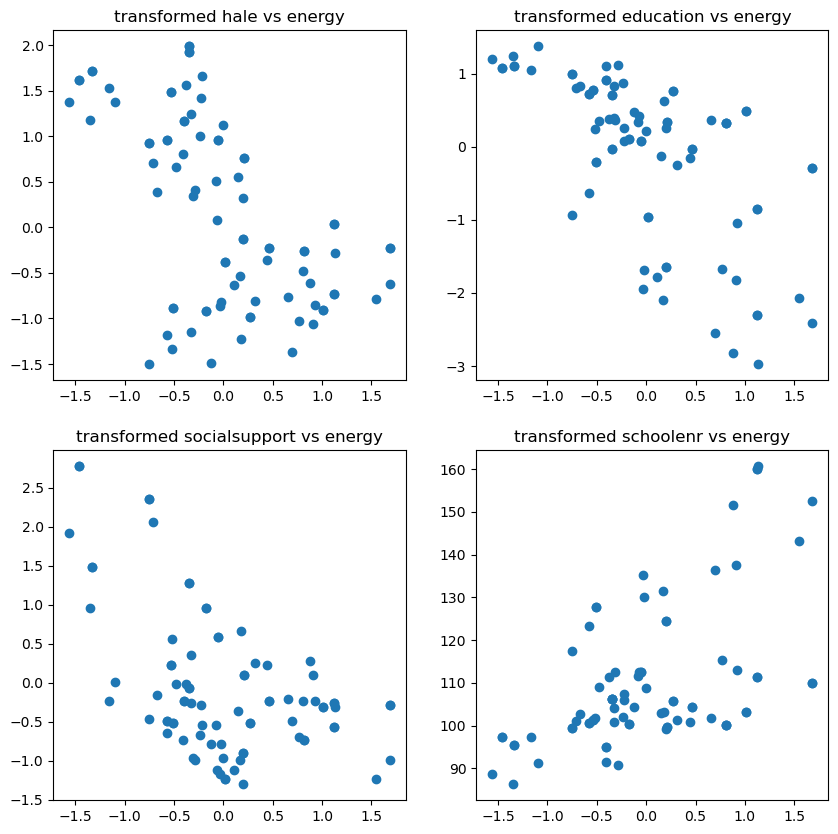

In [ ]:
bivariate_hale_balanced = final_datasets['bivariate_hale']['balanced']
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(bivariate_hale_balanced["energy"], bivariate_hale_balanced["hale"])
axs[0, 0].set_title('transformed hale vs energy')
axs[0, 1].scatter(bivariate_hale_balanced["energy"], bivariate_hale_balanced["education"])
axs[0, 1].set_title('transformed education vs energy')
axs[1, 0].scatter(bivariate_hale_balanced["energy"], bivariate_hale_balanced["socialsupport"])
axs[1, 0].set_title('transformed socialsupport vs energy')
axs[1, 1].scatter(bivariate_hale_balanced["energy"], bivariate_hale_balanced["schoolenr"])
axs[1, 1].set_title('transformed schoolenr vs energy')

In [ ]:
# bivariate_hale_balanced_exiobase = final_datasets['bivariate_hale']['balanced_exiobase']
# fig, axs = plt.subplots(2, 2, figsize=(10, 10))
# axs[0, 0].scatter(bivariate_hale_balanced_exiobase["energy"], bivariate_hale_balanced_exiobase["hale"])
# axs[0, 0].set_title('transformed hale vs energy')
# axs[0, 1].scatter(bivariate_hale_balanced_exiobase["energy"], bivariate_hale_balanced_exiobase["education"])
# axs[0, 1].set_title('transformed education vs energy')
# axs[1, 0].scatter(bivariate_hale_balanced_exiobase["energy"], bivariate_hale_balanced_exiobase["socialsupport"])
# axs[1, 0].set_title('transformed socialsupport vs energy')
# axs[1, 1].scatter(bivariate_hale_balanced_exiobase["energy"], bivariate_hale_balanced_exiobase["schoolenr"])
# axs[1, 1].set_title('transformed schoolenr vs energy')

In [ ]:
# bivariate_hale_balanced_accounts = final_datasets['bivariate_hale']['balanced_accounts']
# fig, axs = plt.subplots(2, 2, figsize=(10, 10))
# axs[0, 0].scatter(bivariate_hale_balanced_accounts["energy"], bivariate_hale_balanced_accounts["hale"])
# axs[0, 0].set_title('transformed hale vs energy')
# axs[0, 1].scatter(bivariate_hale_balanced_accounts["energy"], bivariate_hale_balanced_accounts["education"])
# axs[0, 1].set_title('transformed education vs energy')
# axs[1, 0].scatter(bivariate_hale_balanced_accounts["energy"], bivariate_hale_balanced_accounts["socialsupport"])
# axs[1, 0].set_title('transformed socialsupport vs energy')
# axs[1, 1].scatter(bivariate_hale_balanced_accounts["energy"], bivariate_hale_balanced_accounts["schoolenr"])
# axs[1, 1].set_title('transformed schoolenr vs energy')

In [ ]:
# bivariate_hale_balanced_accounts_exiobase = final_datasets['bivariate_hale']['balanced_accounts_exiobase']
# fig, axs = plt.subplots(2, 2, figsize=(10, 10))
# axs[0, 0].scatter(bivariate_hale_balanced_accounts_exiobase["energy"], bivariate_hale_balanced_accounts_exiobase["hale"])
# axs[0, 0].set_title('transformed hale vs energy')
# axs[0, 1].scatter(bivariate_hale_balanced_accounts_exiobase["energy"], bivariate_hale_balanced_accounts_exiobase["education"])
# axs[0, 1].set_title('transformed education vs energy')
# axs[1, 0].scatter(bivariate_hale_balanced_accounts_exiobase["energy"], bivariate_hale_balanced_accounts_exiobase["socialsupport"])
# axs[1, 0].set_title('transformed socialsupport vs energy')
# axs[1, 1].scatter(bivariate_hale_balanced_accounts_exiobase["energy"], bivariate_hale_balanced_accounts_exiobase["schoolenr"])
# axs[1, 1].set_title('transformed schoolenr vs energy')

Is the dataset balanced? True
Total number of observations: 84


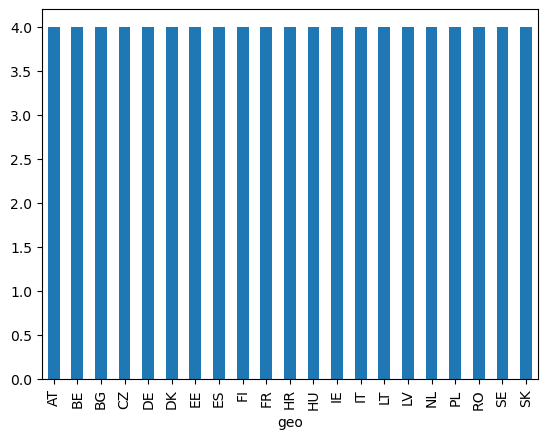

In [ ]:
counts = final_datasets['bivariate_hale']['balanced'].groupby('geo')['TIME_PERIOD'].count()
counts.plot(kind='bar')
is_balanced = counts.nunique() == 1
print("Is the dataset balanced?", is_balanced)
total_observations = final_datasets['bivariate_hale']['balanced'].shape[0]
print("Total number of observations:", total_observations)

In [ ]:
# counts = final_datasets['bivariate_hale']['balanced_accounts'].groupby('geo')['TIME_PERIOD'].count()
# counts.plot(kind='bar')
# is_balanced = counts.nunique() == 1
# print("Is the dataset balanced?", is_balanced)
# total_observations = final_datasets['bivariate_hale']['balanced_accounts'].shape[0]
# print("Total number of observations:", total_observations)

In [ ]:
# optional QQ plots
# for reg in bivariate_regressions:
#     fig = sm.qqplot(data=reg.resid, line='45')
#     fig.suptitle('QQ plot for residuals of regression of {} on {} (labour cost survey)'.format('hale', ['energy']))

# Single provisioning factors regressions

$$
  \widetilde{NS}_i = a + b_1 \widetilde{ENU}_i + b_2 \widetilde{PF}_i  + b_3 \widetilde{ENU}_i * \widetilde{PF}_i + e_i
$$

In [ ]:
single_regressions_balanced = []
single_regressions_unbalanced = []
single_regressions_balanced_accounts = []
single_regressions_unbalanced_accounts = []
single_regressions_balanced_exiobase = []
single_regressions_unbalanced_exiobase = []
single_regressions_balanced_accounts_exiobase = []
single_regressions_unbalanced_accounts_exiobase = []

In [ ]:
for y_variable in y_variables:
    for x_variable in x_variables:
        datasets = create_datasets(y_variable, ['energy', x_variable])
        final_datasets[f'single_{y_variable}_{x_variable}'] = datasets
        if not datasets['balanced'].empty:
            single_regressions_balanced.extend(perform_regressions(datasets['balanced'], y_variable, ['energy', x_variable], regression_types, assumptions, "Single balanced"))
        single_regressions_unbalanced.extend(perform_regressions(datasets['unbalanced'], y_variable, ['energy', x_variable], regression_types, assumptions, "Single unbalanced"))
        # single_regressions_balanced_accounts.extend(perform_regressions(datasets['balanced_accounts'], y_variable, ['energy', x_variable], regression_types, assumptions, "Single balanced accounts"))
        # single_regressions_unbalanced_accounts.extend(perform_regressions(datasets['unbalanced_accounts'], y_variable, ['energy', x_variable], regression_types, assumptions, "Single unbalanced accounts"))
        # single_regressions_balanced_exiobase.extend(perform_regressions(datasets['balanced_exiobase'], y_variable, ['energy', x_variable], regression_types, assumptions, "Single balanced exiobase"))
        # single_regressions_unbalanced_exiobase.extend(perform_regressions(datasets['unbalanced_exiobase'], y_variable, ['energy', x_variable], regression_types, assumptions, "Single unbalanced exiobase"))
        # single_regressions_balanced_accounts_exiobase.extend(perform_regressions(datasets['balanced_accounts_exiobase'], y_variable, ['energy', x_variable], regression_types, assumptions, "Single balanced accounts exiobase"))
        # single_regressions_unbalanced_accounts_exiobase.extend(perform_regressions(datasets['unbalanced_accounts_exiobase'], y_variable, ['energy', x_variable], regression_types, assumptions, "Single unbalanced accounts exiobase"))

# Multiple provisioning factors regressions

$$
  \widetilde{NS}_i = \hat{a} + \hat{b_1} \widetilde{ENU}_i + \hat{b_2} \widetilde{PF}_{1,i}  + \hat{b_3} \widetilde{PF}_{2,i} + \hat{b_4} \widetilde{PF}_{3,i}  + e_i
$$

 - Independent variables: Energy, Foundational economy (Material, Providential, Overlooked, Other), Government Effectiveness, Gini

First use healthy life expectancy (hale) as the dependent variable

In [ ]:
multiple_regressions_balanced = []
multiple_regressions_unbalanced = []
multiple_regressions_balanced_accounts = []
multiple_regressions_unbalanced_accounts = []
multiple_regressions_balanced_exiobase = []
multiple_regressions_unbalanced_exiobase = []
multiple_regressions_balanced_accounts_exiobase = []
multiple_regressions_unbalanced_accounts_exiobase = []

In [ ]:
test_df = create_balanced_panel(foundational_df_transformed_no_outliers, time_periods, 'hale', ['energy', 'material', 'providential', 'other'], balanced=True)
test = regression_model_linearmodels(test_df, 'hale', ['energy', 'material', 'providential', 'other'], "pooled_ols")
test

{'model':                           PooledOLS Estimation Summary                          
 Dep. Variable:                   hale   R-squared:                        0.7722
 Estimator:                  PooledOLS   R-squared (Between):              0.8171
 No. Observations:                  84   R-squared (Within):              -0.0125
 Date:                Sun, Mar 03 2024   R-squared (Overall):              0.7722
 Time:                        12:51:17   Log-likelihood                   -59.079
 Cov. Estimator:             Clustered                                           
                                         F-statistic:                      66.938
 Entities:                          21   P-value                           0.0000
 Avg Obs:                       4.0000   Distribution:                    F(4,79)
 Min Obs:                       4.0000                                           
 Max Obs:                       4.0000   F-statistic (robust):             60.324
       

In [ ]:
non_foundational_x_variables = ['goveffectiveness', 'gini']
x_var_combinations_3_max = []
x_var_combinations_4_max = []
for x_variable in x_variables:
    for variable in non_foundational_x_variables:
        x_var_combinations_3_max.append(['energy', x_variable, variable])
        x_var_combinations_4_max.append(['energy', x_variable, variable])
        for variable_2 in non_foundational_x_variables:
            if variable_2 != variable:
                x_var_combinations_4_max.append(['energy', x_variable, variable, variable_2])

In [ ]:
for y_variable in y_variables:
    for combination in x_var_combinations_3_max:
        datasets = create_datasets(y_variable, combination)
        final_datasets[f'multiple_{y_variable}_{"_".join(combination)}'] = datasets
        if not datasets['balanced'].empty:
            single_regressions_balanced.extend(perform_regressions(datasets['balanced'], y_variable, combination, regression_types, assumptions, "Multiple balanced"))
        single_regressions_unbalanced.extend(perform_regressions(datasets['unbalanced'], y_variable, combination, regression_types, assumptions, "Multiple unbalanced"))
        # single_regressions_balanced_accounts.extend(perform_regressions(datasets['balanced_accounts'], y_variable, combination, regression_types, assumptions, "Multiple balanced accounts"))
        # single_regressions_unbalanced_accounts.extend(perform_regressions(datasets['unbalanced_accounts'], y_variable, combination, regression_types, assumptions, "Multiple unbalanced accounts"))
        # single_regressions_balanced_exiobase.extend(perform_regressions(datasets['balanced_exiobase'], y_variable, combination, regression_types, assumptions, "Multiple balanced exiobase"))
        # single_regressions_unbalanced_exiobase.extend(perform_regressions(datasets['unbalanced_exiobase'], y_variable, combination, regression_types, assumptions, "Multiple unbalanced exiobase"))
        # single_regressions_balanced_accounts_exiobase.extend(perform_regressions(datasets['balanced_accounts_exiobase'], y_variable, combination, regression_types, assumptions, "Multiple balanced accounts exiobase"))
        # single_regressions_unbalanced_accounts_exiobase.extend(perform_regressions(datasets['unbalanced_accounts_exiobase'], y_variable, combination, regression_types, assumptions, "Multiple unbalanced accounts exiobase"))

In [ ]:
test_df = create_datasets('hale', ['energy', 'material', 'providential'])
test_reg = regression_model_linearmodels(test_df['balanced'], 'hale', ['energy', 'material', 'providential'], 'pooled_ols', [['material', 'providential']])

In [ ]:
test_reg

{'model':                           PooledOLS Estimation Summary                          
 Dep. Variable:                   hale   R-squared:                        0.7777
 Estimator:                  PooledOLS   R-squared (Between):              0.8260
 No. Observations:                  84   R-squared (Within):              -0.0647
 Date:                Sun, Mar 03 2024   R-squared (Overall):              0.7777
 Time:                        12:51:44   Log-likelihood                   -58.041
 Cov. Estimator:             Clustered                                           
                                         F-statistic:                      69.107
 Entities:                          21   P-value                           0.0000
 Avg Obs:                       4.0000   Distribution:                    F(4,79)
 Min Obs:                       4.0000                                           
 Max Obs:                       4.0000   F-statistic (robust):             56.481
       

Usually a rule of thumb is to have at least 10-15 observations per parameter. In our case, with 140 observations and 37 parameters, we have approximately 140/37 ≈ 3.78 observations per parameter, which is below this threshold.

A way to address this is to have more time periods     
For a 10:1 ratio: need at least 10 observations per parameter. With 37 parameters, this equates to $37×10=37037×10=370$ total observations. With our 35 countries, this means we need approximately $37035≈10.635370​≈10.6$ time periods.

For a 15:1 ratio: need 15 observations per parameter. This equates to $37×15=55537×15=555$ total observations. With 35 countries, this would be approximately $55535≈15.935555​≈15.9$ time periods.

Accounts data should have enough observations to include up to 3-4 independent variables

Export the regression results to use in the plotting notebook

In [ ]:
%store bivariate_regressions_balanced
%store bivariate_regressions_unbalanced
%store bivariate_regressions_balanced_accounts
%store bivariate_regressions_unbalanced_accounts
%store bivariate_regressions_balanced_exiobase
%store bivariate_regressions_unbalanced_exiobase
%store bivariate_regressions_balanced_accounts_exiobase
%store bivariate_regressions_unbalanced_accounts_exiobase

%store single_regressions_balanced
%store single_regressions_unbalanced
%store single_regressions_balanced_accounts
%store single_regressions_unbalanced_accounts
%store single_regressions_balanced_exiobase
%store single_regressions_unbalanced_exiobase
%store single_regressions_balanced_accounts_exiobase
%store single_regressions_unbalanced_accounts_exiobase

%store multiple_regressions_balanced
%store multiple_regressions_unbalanced
%store multiple_regressions_balanced_accounts
%store multiple_regressions_unbalanced_accounts
%store multiple_regressions_balanced_exiobase
%store multiple_regressions_unbalanced_exiobase
%store multiple_regressions_balanced_accounts_exiobase
%store multiple_regressions_unbalanced_accounts_exiobase

Stored 'bivariate_regressions_balanced' (list)
Stored 'bivariate_regressions_unbalanced' (list)
Stored 'bivariate_regressions_balanced_accounts' (list)
Stored 'bivariate_regressions_unbalanced_accounts' (list)
Stored 'bivariate_regressions_balanced_exiobase' (list)
Stored 'bivariate_regressions_unbalanced_exiobase' (list)
Stored 'bivariate_regressions_balanced_accounts_exiobase' (list)
Stored 'bivariate_regressions_unbalanced_accounts_exiobase' (list)
Stored 'single_regressions_balanced' (list)
Stored 'single_regressions_unbalanced' (list)
Stored 'single_regressions_balanced_accounts' (list)
Stored 'single_regressions_unbalanced_accounts' (list)
Stored 'single_regressions_balanced_exiobase' (list)
Stored 'single_regressions_unbalanced_exiobase' (list)
Stored 'single_regressions_balanced_accounts_exiobase' (list)
Stored 'single_regressions_unbalanced_accounts_exiobase' (list)
Stored 'multiple_regressions_balanced' (list)
Stored 'multiple_regressions_unbalanced' (list)
Stored 'multiple_r

## Regression by sector (Later)
 - Use sectoral energy input (per cap? share?), sectoral labor share and sector-related need satisfaction variable

## Regression by region (Later)
 - Use total regional energy input (per cap? share?), total regional labor share and total regional need satisfaction variable

**Note**: We're not doing a fourth set of 
regressions by region + input due to data availability. Maybe in future research

## Misc/removed for now

In [ ]:
# import scipy.stats as st
# ssr_restricted_model = hale_results.ssr
# ssr_unrestricted_model = fixed_effects_results[0].ssr
# k1 = len(hale_results.params)
# k2 = len(fixed_effects_results[0].params)
# f_statistic = ((ssr_restricted_model - ssr_unrestricted_model) /ssr_unrestricted_model) * ((N-k2)/(k2-k1))
# print('F-statistic for FE model='+str(f_statistic))
# alpha=0.05
# f_critical_value=st.f.ppf((1.0-alpha), (k2-k1), (N-k2))
# print('F test critical value at alpha of 0.05='+str(f_critical_value))

F-statistic is much higher than critical value, so we reject the null hypothesis that the restricted model is better than the unrestricted model. The fixed effects model is better than the pooled OLS model.

In [ ]:
#Concatenate the unit names column to the Dataframe containing the residuals from the Pooled OLSR model
# df_pooled_olsr_resid_with_unitnames = pd.concat([regression_df_no_outliers['geo'],hale_results.resid], axis=1)
# df_pooled_olsr_resid_group_means = df_pooled_olsr_resid_with_unitnames.groupby('geo').mean()
# ssr_grouped_means=(df_pooled_olsr_resid_group_means[0]**2).sum()
# ssr_pooled_olsr=hale_results.ssr
# LM_statistic = (n*T)/(2*(T-1))*math.pow(((T*T*ssr_grouped_means)/ssr_pooled_olsr - 1),2)

# print('BP LM Statistic='+str(LM_statistic))

LM statistic is much higher than critical value, which means random effect is significant.

In [ ]:
# alpha=0.05
# chi2_critical_value=st.chi2.ppf((1.0-alpha), 1)
# print('chi2_critical_value='+str(chi2_critical_value))